# Consumer Spending in Canada  
## A 12-Year Provincial Analysis of Patterns, Economic Drivers, Regional Variations, and Future Trends  

### 1 GROUP E MEMBERS  
- Jereika Aiko Tan  
- Luzviminda Deinla  
- Shijie Liu  
- Simarpreet Kaur  

---

### 2 PROBLEM STATEMENT
 - Over the past 12 years, consumer spending in Canada has been influenced by economic factors like income, inflation, and demographic shifts, with notable variations across provinces due to regional conditions and cultural differences. 
 - However, most studies focus on national-level trends, leaving a gap in understanding province-specific spending patterns. 
 - This study addresses this gap by analyzing consumer spending trends, identifying key drivers and regional differences, and developing predictive models, ultimately providing insights to guide effective responses to future market changes. 


---
    
### 3 OBJECTIVES  
1. Analyze the historical spending patterns in each Canadian province, particularly the major provinces (Ontario, British Columbia, Alberta, Quebec) and Saskatchewan from 2010 to 2021, focusing on housing, food, transportation, and *discretionary goods.  
2. Assess the impact of economic and demographic factors** (e.g., income, inflation, household size, aging) on consumer spending behavior.  
3. Identify regional differences in spending trends and explore their causes.  
4. Develop and evaluate predictive models based on historical data and key drivers, selecting the most accurate model to support businesses and policymakers in forecasting future demand.


### 4 DATA SOURCES

<div style="display: flex; justify-content: space-around; align-items: center;">
    <img src="https://i.imgur.com/naA1xSX.png" alt="StatCan" width="300" height="30" style="margin: 0 20px;"/>
    <img src="https://i.imgur.com/8vu6ZYu.png" alt="GovCan" style="max-width: 1000px; max-height: 70px; margin: 0 70px;"/>
    <img src="https://i.imgur.com/5LkxgbC.png" alt="Bankof Can" width="200" height="50" style="margin: 0 20px;"/>
</div>



### 5 TOOLS AND METHODOLOGY

<div style="display: flex; justify-content: space-around; align-items: center;">
    <img src="https://i.imgur.com/SHslT1L.png" alt="MSExcelLogo" width="400" height="1" style="margin: 0 10px;"/>
    <img src="https://i.imgur.com/gOEeYzU.png" alt="PythonLogo" style="max-width: 1000px; max-height: 70px; margin: 0 10px;"/>
    <img src="https://i.imgur.com/S4qDRb4.png" alt="JupyterLogo" width="200" height="50" style="margin: 0 20px;"/>
</div>



##### Initial Data Preparation and Cleaning through MS excel.
 - Created a unified, multidimensional dataset by merging 5 files from various sources
 - Narrowed sub-categories from 362 down to 10 key spend categories and removed the duplicates without losing relevant information as the collected dataset was organized into main categories and sub-categories, with totals and subtotals
 - Due to merging process, some variables in the dataset did not align consistently across all records, resulting in blanks or missing data. To address this, these blanks were replaced with zero values (0) as placeholders, ensuring the dataset remains complete and usable for analysis while preserving its structure.
 - Removed irrelevant rows and columns, ensure comparability across records.
 - Added a 'Data Type' column to simplify filtering and segmentation by grouping data into categories like 'Spend: Category,' 'Spend: Age,' and 'Income: Age.' This enables targeted analysis of specific aspects, enhancing the dataset's usability and aligning it with the our project's analysis objectives.

### 6 DATA LOADING AND INITIAL INSPECTION

### 6.1 Importing necessary libraries

In [1]:
# For data cleaning/wrangling
import numpy as np # vectors and matrices || Linear Algebra
import pandas as pd # tables and data manipulations
# Visualization Libraries
import matplotlib.pyplot as plt # plots
import seaborn as sns # attractive plots

### 6.2 Loading the dataset

In [2]:
dataset = pd.read_csv('Household Spend, Income and Consumer Price Index_upload file 4.csv')
dataset.head()

,Year,Region,Data Type,Household Spend Category,Income Quintile,Household Type,Age Group,Average expenditure per household (CAD),Consumer Price Index,Disposable income per household (CAD)
0,2010,Canada,Spend: Category,Food,0,0,0,5709,123.1,0
1,2010,Canada,Spend: Category,Food,0,0,0,2141,123.1,0
2,2010,Canada,Spend: Category,Housing,0,0,0,3088,123.3,0
3,2010,Canada,Spend: Category,Housing,0,0,0,4699,123.3,0
4,2010,Canada,Spend: Category,Housing,0,0,0,383,123.3,0


### 6.3 Missing Values Check

In [3]:
dataset.isnull().sum()

Year                                       0
Region                                     0
Data Type                                  0
Household Spend Category                   0
Income Quintile                            0
Household Type                             0
Age Group                                  0
Average expenditure per household (CAD)    0
Consumer Price Index                       0
Disposable income per household (CAD)      0
dtype: int64

No missing values found in any columns.

### 6.4 Data Types Overview

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50545 entries, 0 to 50544
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     50545 non-null  int64  
 1   Region                                   50545 non-null  object 
 2   Data Type                                50545 non-null  object 
 3   Household Spend Category                 50545 non-null  object 
 4   Income Quintile                          50545 non-null  object 
 5   Household Type                           50545 non-null  object 
 6   Age Group                                50545 non-null  object 
 7   Average expenditure per household (CAD)  50545 non-null  int64  
 8   Consumer Price Index                     50545 non-null  float64
 9   Disposable income per household (CAD)    50545 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usag

 - The dataset consists of 50,545 datapoints, 10 columns with a mix of integer, float, and object data types.

### 7 EXPLORATORY DATA ANALYSIS

### 7.1 Summary Statistics for Numeric Variables

In [5]:
summary_stats = dataset.describe()
# Print the summaries
print("Summary Statistics for Numeric Variables:\n")
print(summary_stats)

Summary Statistics for Numeric Variables:

               Year  Average expenditure per household (CAD)  \
count  50545.000000                             50545.000000   
mean    2014.827065                              1273.998259   
std        3.365301                              2887.531264   
min     2010.000000                                 0.000000   
25%     2012.000000                               123.000000   
50%     2015.000000                               497.000000   
75%     2017.000000                              1322.000000   
max     2021.000000                             75688.000000   

       Consumer Price Index  Disposable income per household (CAD)  
count          50545.000000                           50545.000000  
mean             108.127346                            2236.054783  
std               40.489372                           14125.630277  
min                0.000000                               0.000000  
25%              100.500000        

######  Average Expenditure per Household (CAD):
 - Skewed distribution with higher maximum values due to high-income households or high-cost essential spending categories like housing.
 - Low median (497 CAD) and mean (1273.99 CAD) values indicate diverse spending behavior, with many households spending less while the average reflects a broad range of spending categories, including some with lower costs
 - The 0 values represent missing expenditure data missing data rather than actual values due to gaps caused by merging process.  They are placeholders used to retain the features in the dataset and are important for maintaining  dataset structure without distorting the analysis.
###### Consumer Price Index (CPI):
 - Reflects inflation trends over the years, with a mean of 108.13 and rising quartiles.
 - High variability (std: 40.49) suggests significant economic events impacting inflation.
 - 0 values likely indicate missing CPI data rather than true economic conditiondue to gaps caused by merging process.  They are placeholders used to retain the features in the dataset and are important for maintaining  dataset structure without distorting the analysis.
###### Disposable Income per Household (CAD):
 - Large variation (std: 14,125.63 CAD) highlights broad income disparities across households.
 - The presence of many 0 values suggests missing data  rather than actual values due to gaps caused by merging process.  They are placeholders used to retain the features in the dataset and are important for maintaining  dataset structure without distorting the analysis.
 - Maximum income (220,402 CAD) reflects high-income households significantly impacting the range.


### 7.2 Trend Analysis: Overview of Spending Over Years

### 7.2.1 Household Spending Trends by Category (2010-2021)

Filtered Pivot Table by Household Spend Category
Household Spend Category   Food  Housing  Transportation  Discretionary goods
Year                                                                         
2010                       7850    15021           11158                 8708
2011                       7791    15216           11260                 9376
2012                       7759    15808           11203                 9412
2013                       7934    16360           12045                 9838
2014                       8109    17160           11891                 9743
2015                       8628    17509           11762                10136
2016                       8784    18032           11907                10300
2017                       8968    18638           12721                10615
2019                      10311    20201           12737                13253
2021                      10254    21105           10098                12190


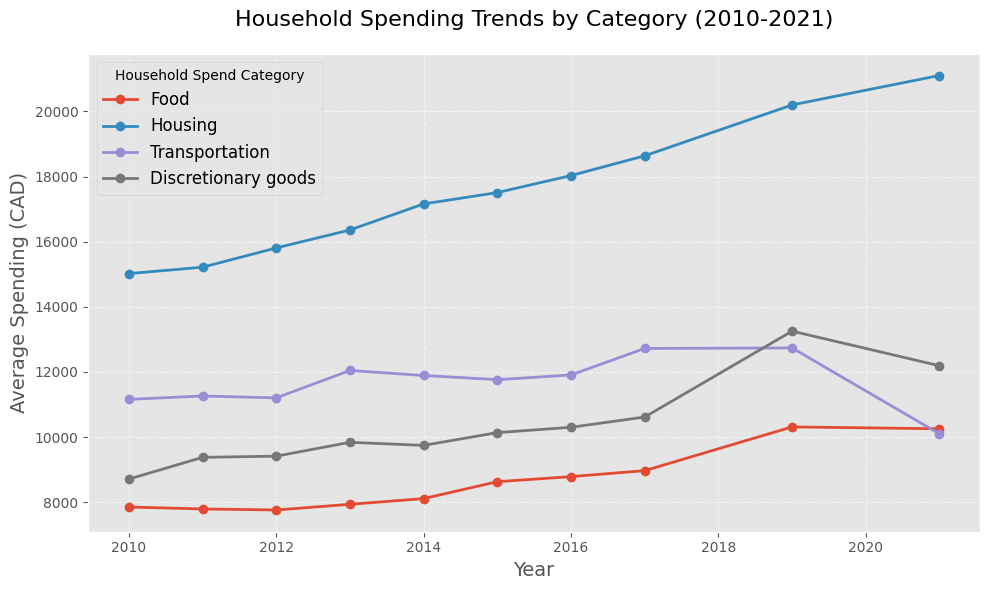

In [6]:
# Filter 'Spend: Category'
filtered_dataset_cat = dataset[dataset['Data Type'] == 'Spend: Category']

# Filter rows where 'Region' column is 'Canada'
filtered_dataset_cat = filtered_dataset_cat[filtered_dataset_cat['Region'] == 'Canada']

# Create pivot table
pivot_table_cat = pd.pivot_table(
    filtered_dataset_cat,
    values='Average expenditure per household (CAD)',
    index='Year', 
    columns='Household Spend Category', 
    aggfunc='sum',
    margins=True,  
    margins_name='Grand Total'
)

# Filter specific categories (Food, Housing, Transportation, Discretionary goods)
filtered_pivot_table_cat = pivot_table_cat[['Food', 'Housing', 'Transportation', 'Discretionary goods']]

# Filter out rows where index is  'Grand Total'
filtered_pivot_table_cat = filtered_pivot_table_cat[filtered_pivot_table_cat.index != 'Grand Total']

# Print the final filtered pivot table
print("Filtered Pivot Table by Household Spend Category")
print(filtered_pivot_table_cat)
import matplotlib.pyplot as plt

# Set a style
plt.style.use('ggplot')


# Plot each household spend category with a line chart
plt.figure(figsize=(10, 6))

# Loop through each column in the filtered pivot table and plot it with specified colors
for category in filtered_pivot_table_cat.columns:
    plt.plot(
        filtered_pivot_table_cat.index, 
        filtered_pivot_table_cat[category], 
        marker='o', 
        label=category,
        linewidth=2
    )

# Add titles and labels
plt.title('Household Spending Trends by Category (2010-2021)', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Spending (CAD)', fontsize=14)
plt.legend(title="Household Spend Category", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


 - The trend analysis reveals a continuous increase in essential spending, with food and housing consistently prioritized due to their necessity. Housing, in particular, experienced the most substantial growth.
 - While transportation spending initially rose, it sharply declined post-2019 due to the COVID-19 pandemic, reflecting reduced commuting and travel needs.
 - Discretionary spending peaked in 2019 but saw a slight decline by 2021, likely due to pandemic-induced economic caution.

### 7.2.2 Household Spending Trends by Province (2010-2021)

Filtered Pivot Table by Province
Region  Alberta  British Columbia  Ontario  Quebec  Saskatchewan
Year                                                            
2010      89625             75051    75975   62878         70826
2011      89903             75446    77443   65152         71125
2012      97847             74764    79264   65236         75473
2013     101888             79082    82688   69072         79768
2014     100960             80673    84437   68961         85024
2015     110308             85704    85481   68197         89737
2016     106462             85820    89065   70739         89234
2017     101135             92691    90586   73558         88346
2019     113743            102924    98090   81073         97446
2021     104371            101374    98241   81733         92307


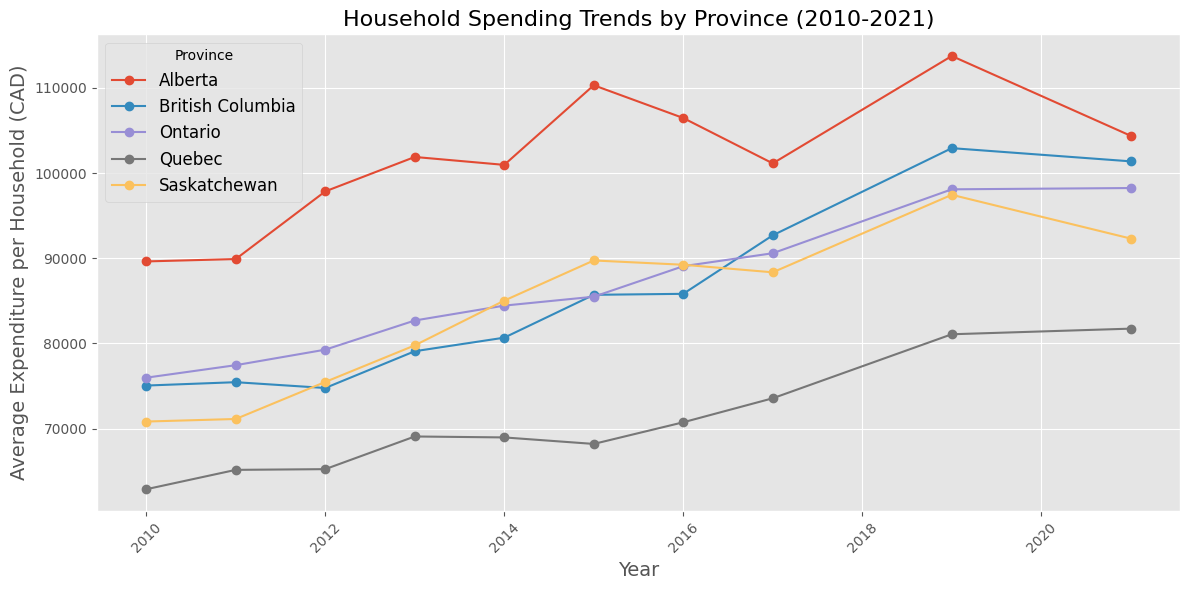

In [7]:
# Filter 'Spend: Category'
filtered_dataset_prov = dataset[dataset['Data Type'] == 'Spend: Category']

# Create pivot table
pivot_table_prov = pd.pivot_table(
    filtered_dataset_prov,
    values='Average expenditure per household (CAD)',
    index='Year', 
    columns='Region', 
    aggfunc='sum',
    margins=True,  
    margins_name='Grand Total'
)

# Filter specific provinces
filtered_pivot_table_prov = pivot_table_prov[['Alberta', 'British Columbia', 'Ontario', 'Quebec', 'Saskatchewan']]

# Filter out rows where index is  'Grand Total'
filtered_pivot_table_prov = filtered_pivot_table_prov[filtered_pivot_table_prov.index != 'Grand Total']

# Print the final filtered pivot table
print("Filtered Pivot Table by Province")
print(filtered_pivot_table_prov)

import pandas as pd
import matplotlib.pyplot as plt

# Create a line chart
plt.figure(figsize=(12, 6))
for province in filtered_pivot_table_prov.columns:
    plt.plot(filtered_pivot_table_prov.index, 
             filtered_pivot_table_prov[province], 
             marker='o', 
             label=province, 
            )
# Add titles and labels
plt.title('Household Spending Trends by Province (2010-2021)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Expenditure per Household (CAD)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Province', fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

- Household spending trends vary across provinces, with Alberta consistently showing the highest average expenditure per household, despite some fluctuations. 
- British Columbia and Ontario show steady growth, while Quebec and Saskatchewan have relatively lower and stable spending trends. 
- The differences highlight regional disparities in household spending across Canada from 2010 to 2021.

### 7.3 Provincial Share of Household Expenditure

Filtered Pivot Table by Province1
                  Average expenditure per household (CAD)
Region                                                   
Alberta                                           1016242
British Columbia                                   853529
Ontario                                            861270
Quebec                                             706599
Saskatchewan                                       839286


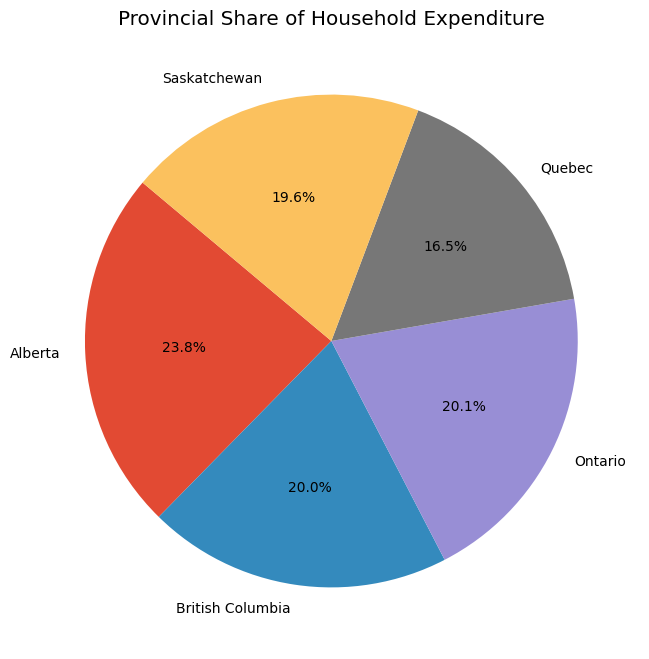

In [8]:
# Filter rows where 'Data Type' is 'Spend: Category'
filtered_dataset_prov1 = dataset[dataset['Data Type'] == 'Spend: Category']

# Create pivot table
pivot_table_prov1 = pd.pivot_table(
    filtered_dataset_prov1,
    values='Average expenditure per household (CAD)',
    index='Region', 
    aggfunc='sum',
    margins=False,
)

# Filter specific provinces
filtered_pivot_table_prov1 = pivot_table_prov1.loc[['Alberta', 'British Columbia', 'Ontario', 'Quebec', 'Saskatchewan']]

# Print the final filtered pivot table
print("Filtered Pivot Table by Province1")
print(filtered_pivot_table_prov1)

import matplotlib.pyplot as plt

# Plot a pie chart to show the share of household expenditure by province
plt.figure(figsize=(8, 8))
plt.pie(
    filtered_pivot_table_prov1['Average expenditure per household (CAD)'],
    labels=filtered_pivot_table_prov1.index,
    autopct='%1.1f%%',  # Display percentage to 1 decimal place
    startangle=140, ) # Start angle for better layout

# Title for the pie chart
plt.title('Provincial Share of Household Expenditure')

# Show the pie chart
plt.show()



- The pie chart shows that Alberta has the highest share of household expenditure at 23.8%, followed closely by Ontario (20.1%) and British Columbia (20.0%). Saskatchewan (19.6%) and Quebec (16.5%) have relatively lower shares. 
- This distribution highlights Alberta's larger household expenditure compared to other provinces.

### 7.4 Provincial Comparison of Average Household Expenditure by Category

### 7.4.1 Alberta

Filtered Pivot Table Alberta Household Spend
Household Spend Category   Food  Housing  Transportation  Discretionary goods
Year                                                                         
2010                       8887    17415           12857                11370
2011                       8559    18618           13763                12385
2012                       8457    19227           14680                12836
2013                       9328    19397           15196                13458
2014                       8740    20486           15402                12746
2015                      10170    21600           16799                13412
2016                       9766    21314           15317                12719
2017                       9864    20970           15465                12485
2019                      11322    22410           15630                16994
2021                      11808    23050           11064                13134


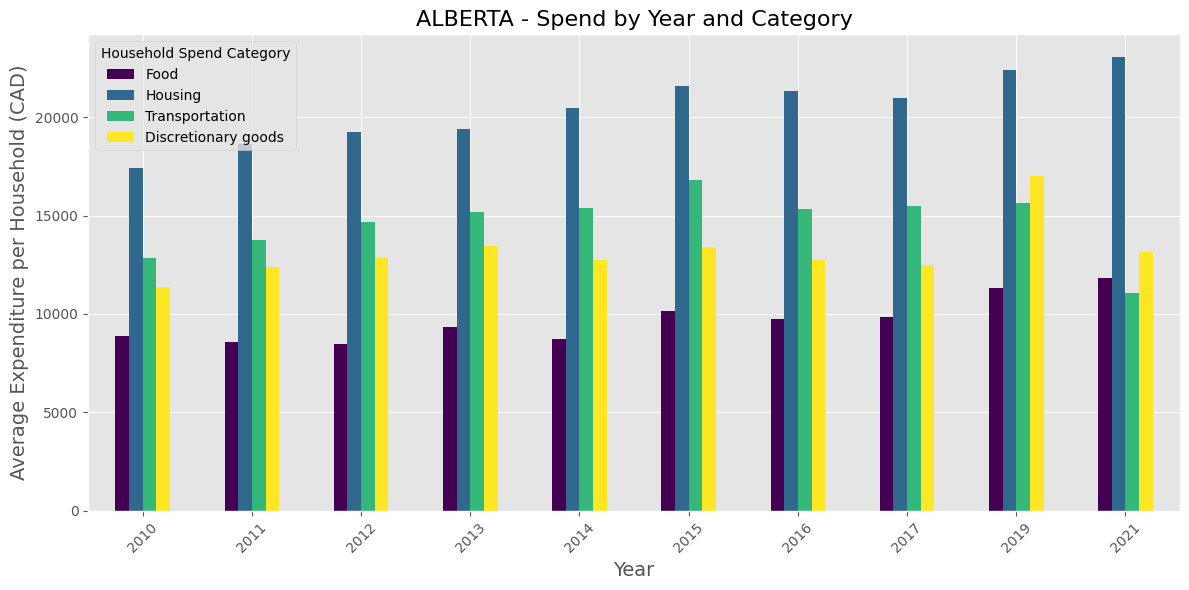

In [9]:
# Filter 'Spend: Category'
filtered_dataset_AB = dataset[dataset['Data Type'] == 'Spend: Category']

# Filter rows where 'Region' column is 'Alberta'
filtered_dataset_AB = filtered_dataset_AB[filtered_dataset_AB['Region'] == 'Alberta']

# Create pivot table
pivot_table_AB = pd.pivot_table(
    filtered_dataset_AB,
    values='Average expenditure per household (CAD)',
    index='Year',  
    columns='Household Spend Category',
    aggfunc='sum',
)

# Filter specific categories (Food, Housing, Transportation, Discretionary goods)
filtered_pivot_table_AB = pivot_table_AB[['Food', 'Housing', 'Transportation', 'Discretionary goods']]


# Reorder the columns in the specific order
column_order = ['Food', 'Housing', 'Transportation', 'Discretionary goods']
filtered_pivot_table_AB = filtered_pivot_table_AB[column_order]

# Print the final filtered pivot table
print("Filtered Pivot Table Alberta Household Spend")
print(filtered_pivot_table_AB)

# Plot the bar chart
filtered_pivot_table_AB.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Customize the plot
plt.title('ALBERTA - Spend by Year and Category', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Expenditure per Household (CAD)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Household Spend Category', fontsize=10)

# Step 10: Save the bar chart as an image file
plt.savefig('Alberta.png', format='png', dpi=300)

# Step 11: Show the bar chart
plt.tight_layout()  # Adjust layout for better fit
plt.show()

 - Alberta households consistently allocate the highest proportion of their budgets to housing, followed by transportation Alberta households consistently allocate the highest proportion of their budgets to housing, followed by transportation, while food and discretionary goods receive lower and more stable allocations.
 - The trends from 2010 to 2021 reflect rising housing and food costs, a sharp decline in transportation in 2021 due to the pandemic, and a notable decrease in discretionary spending following a peak in 2019, reflecting the impact of inflation, housing market pressures, and a shift in consumer priorities towards essential needs.

### 7.4.2 British Columbia

Filtered Pivot Table British Columbia Household Spend
Household Spend Category   Food  Housing  Transportation  Discretionary goods
Year                                                                         
2010                       8732    16954           11267                 9507
2011                       8121    16625           11046                10041
2012                       8438    18221           10448                 8915
2013                       8118    18888           11298                 9960
2014                       8218    18462           11464                10804
2015                       9168    19923           12012                11132
2016                       9139    19405           12079                11167
2017                       9735    21757           13942                11189
2019                      10639    23874           14259                15944
2021                      11283    24596           10870                13841


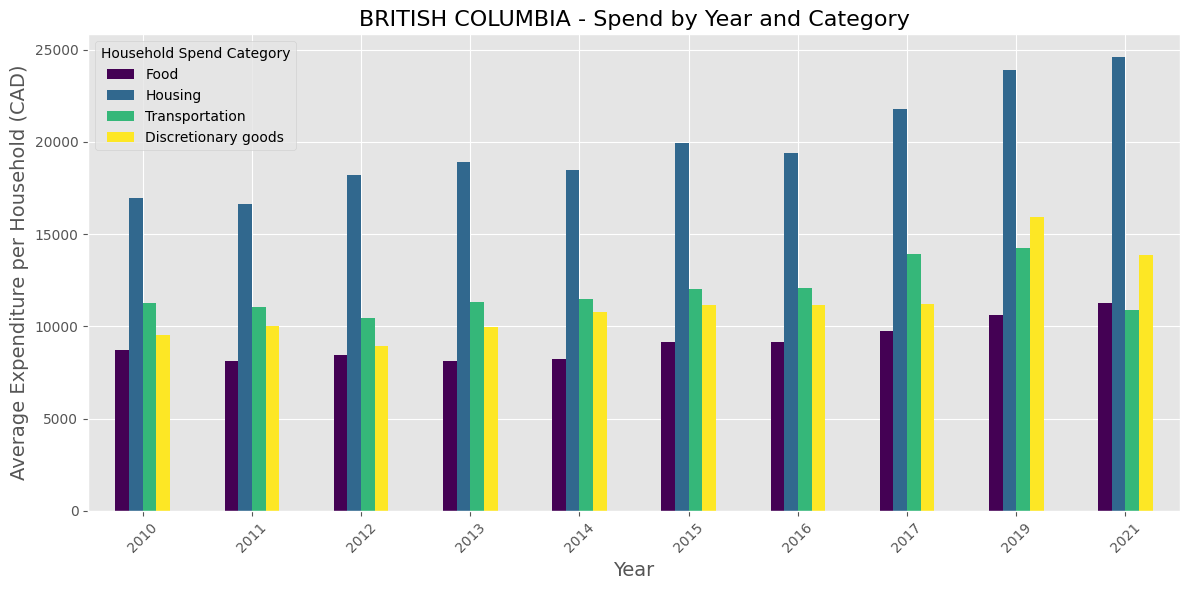

In [10]:
# Filter 'Spend: Category'
filtered_dataset_BC = dataset[dataset['Data Type'] == 'Spend: Category']

# Filter rows where 'Region' column is 'British Columbia'
filtered_dataset_BC = filtered_dataset_BC[filtered_dataset_BC['Region'] == 'British Columbia']

# Create pivot table
pivot_table_BC = pd.pivot_table(
    filtered_dataset_BC,
    values='Average expenditure per household (CAD)',
    index='Year',  
    columns='Household Spend Category',
    aggfunc='sum',
)

# Filter specific categories (Food, Housing, Transportation, Discretionary goods)
filtered_pivot_table_BC = pivot_table_BC[['Food', 'Housing', 'Transportation', 'Discretionary goods']]


# Reorder the columns in the specific order
column_order = ['Food', 'Housing', 'Transportation', 'Discretionary goods']
filtered_pivot_table_BC = filtered_pivot_table_BC[column_order]

# Print the final filtered pivot table
print("Filtered Pivot Table British Columbia Household Spend")
print(filtered_pivot_table_BC)

# Plot the bar chart
filtered_pivot_table_BC.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Customize the plot
plt.title('BRITISH COLUMBIA - Spend by Year and Category', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Expenditure per Household (CAD)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Household Spend Category', fontsize=10)

# Save the bar chart as an image file
plt.savefig('BC.png', format='png', dpi=300)

# Show the bar chart
plt.tight_layout()  # Adjust layout for better fit
plt.show()

 - Households in British Columbia consistently allocate the largest portion of their budgets to housing, with transportation, discretionary goods, and food following at a considerable distance.
 - The trends from 2010 to 2021 reflect rising housing and food costs, a decline in transportation spending due to the pandemic, and a shift in discretionary spending towards essential needs, highlighting the impact of inflation, housing market pressures, and economic caution on spending behavior.

### 7.4.3 Ontario

Filtered Pivot Table Ontario Household Spend
Household Spend Category   Food  Housing  Transportation  Discretionary goods
Year                                                                         
2010                       7737    16717           11646                 8664
2011                       7799    16880           11264                 9529
2012                       7463    17132           11470                 9453
2013                       7751    18039           12078                10127
2014                       8103    19408           11713                 9647
2015                       8475    19198           11813                10502
2016                       8747    20388           12347                10665
2017                       9099    20776           13099                11207
2019                      10419    22040           12830                12750
2021                       9794    24100            9825                12113


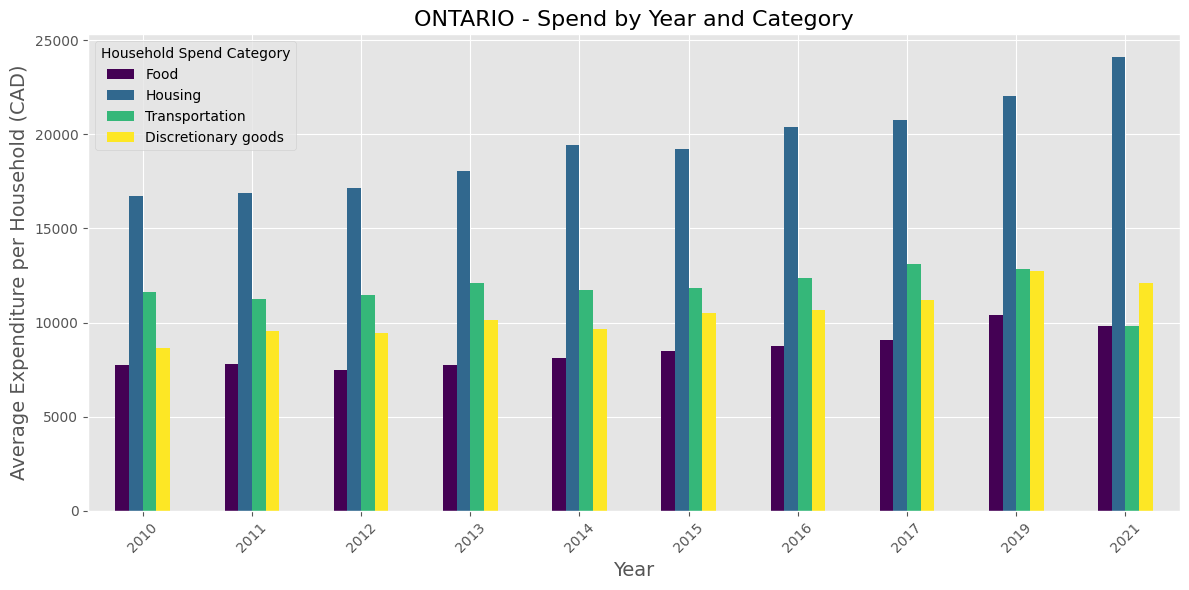

In [11]:
# Filter 'Spend: Category'
filtered_dataset_ON = dataset[dataset['Data Type'] == 'Spend: Category']

# Filter rows where 'Region' column is 'Ontario'
filtered_dataset_ON = filtered_dataset_ON[filtered_dataset_ON['Region'] == 'Ontario']

# Create pivot table
pivot_table_ON = pd.pivot_table(
    filtered_dataset_ON,
    values='Average expenditure per household (CAD)',
    index='Year',  
    columns='Household Spend Category',
    aggfunc='sum',
)

# Filter specific categories (Food, Housing, Transportation, Discretionary goods)
filtered_pivot_table_ON = pivot_table_ON[['Food', 'Housing', 'Transportation', 'Discretionary goods']]


# Reorder the columns in the specific order
column_order = ['Food', 'Housing', 'Transportation', 'Discretionary goods']
filtered_pivot_table_ON = filtered_pivot_table_ON[column_order]

# Print the final filtered pivot table
print("Filtered Pivot Table Ontario Household Spend")
print(filtered_pivot_table_ON)

# Plot the bar chart
filtered_pivot_table_ON.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Customize the plot
plt.title('ONTARIO - Spend by Year and Category', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Expenditure per Household (CAD)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Household Spend Category', fontsize=10)

# Save the bar chart as an image file
plt.savefig('ON.png', format='png', dpi=300)

# Show the bar chart
plt.tight_layout()  # Adjust layout for better fit
plt.show()

- Ontario households allocate the largest portion of their budgets to housing, followed by transportation, with food and discretionary goods receiving relatively lower but steadily increasing allocations.
- 2010 to 2021 trends show significant increases in housing and food costs, a sharp decline in transportation spending due to reduced commuting during the pandemic, and a slight decrease in discretionary spending, reflecting economic uncertainty and a shift towards prioritizing essential needs amid inflation and the housing market pressures.

### 7.4.4 Quebec

Filtered Pivot Table Quebec Household Spend
Household Spend Category  Food  Housing  Transportation  Discretionary goods
Year                                                                        
2010                      7409    12022            9956                 7204
2011                      7455    12186           10365                 7635
2012                      7715    12564            9476                 7319
2013                      7892    12782           10719                 7977
2014                      7771    13186           10358                 7858
2015                      8155    13475            9063                 7643
2016                      8474    13972            9619                 8230
2017                      8199    14555           10134                 8855
2019                      9847    15822           10493                10802
2021                      9670    15847            9408                10621


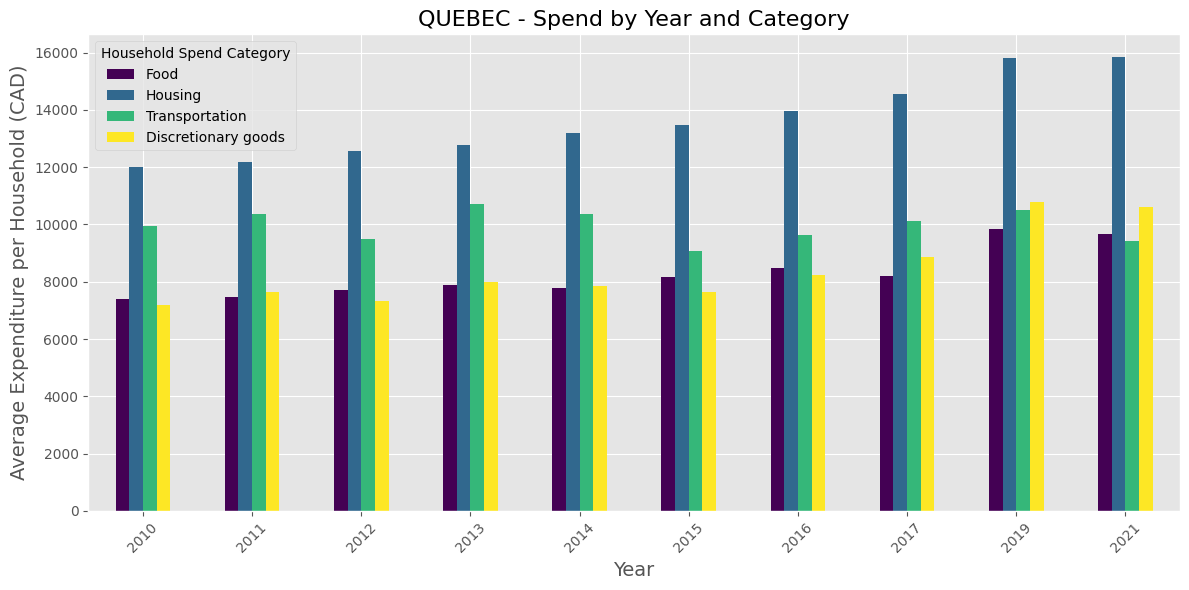

In [12]:
# Filter 'Spend: Category'
filtered_dataset_QC = dataset[dataset['Data Type'] == 'Spend: Category']

# Filter rows where 'Region' column is 'Quebec'
filtered_dataset_QC = filtered_dataset_QC[filtered_dataset_QC['Region'] == 'Quebec']

# Create pivot table
pivot_table_QC = pd.pivot_table(
    filtered_dataset_QC,
    values='Average expenditure per household (CAD)',
    index='Year',  
    columns='Household Spend Category',
    aggfunc='sum',
)

# Filter specific categories (Food, Housing, Transportation, Discretionary goods)
filtered_pivot_table_QC = pivot_table_QC[['Food', 'Housing', 'Transportation', 'Discretionary goods']]


# Reorder the columns in the specific order
column_order = ['Food', 'Housing', 'Transportation', 'Discretionary goods']
filtered_pivot_table_QC = filtered_pivot_table_QC[column_order]

# Print the final filtered pivot table
print("Filtered Pivot Table Quebec Household Spend")
print(filtered_pivot_table_QC)

# Plot the bar chart
filtered_pivot_table_QC.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Customize the plot
plt.title('QUEBEC - Spend by Year and Category', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Expenditure per Household (CAD)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Household Spend Category', fontsize=10)

# Save the bar chart as an image file
plt.savefig('QC.png', format='png', dpi=300)

# Show the bar chart
plt.tight_layout()  # Adjust layout for better fit
plt.show()

 - In Quebec, households allocate the largest share of their budgets to housing, followed by transportation, with food and discretionary goods receiving smaller, more stable portions.
 - From 2010 to 2021, housing costs rose significantly, food spending grew steadily, transportation costs saw a slight increase before declining due to the pandemic, and discretionary spending peaked in 2019 before decreasing slightly, reflecting a shift towards essential needs amidst rising costs and economic uncertainty.

### 7.4.4 Saskatchewan

Filtered Pivot Table Saskatchewan Household Spend
Household Spend Category   Food  Housing  Transportation  Discretionary goods
Year                                                                         
2010                       7369    13880           11616                 9532
2011                       7691    13015           11292                10088
2012                       7428    13686           12171                10533
2013                       7331    14742           14285                10236
2014                       8708    16182           14051                11921
2015                       8618    16914           15237                12311
2016                       8888    17215           14522                11404
2017                       9584    17307           13522                12148
2019                      10428    19419           14038                15557
2021                      11595    18705           10708                14326


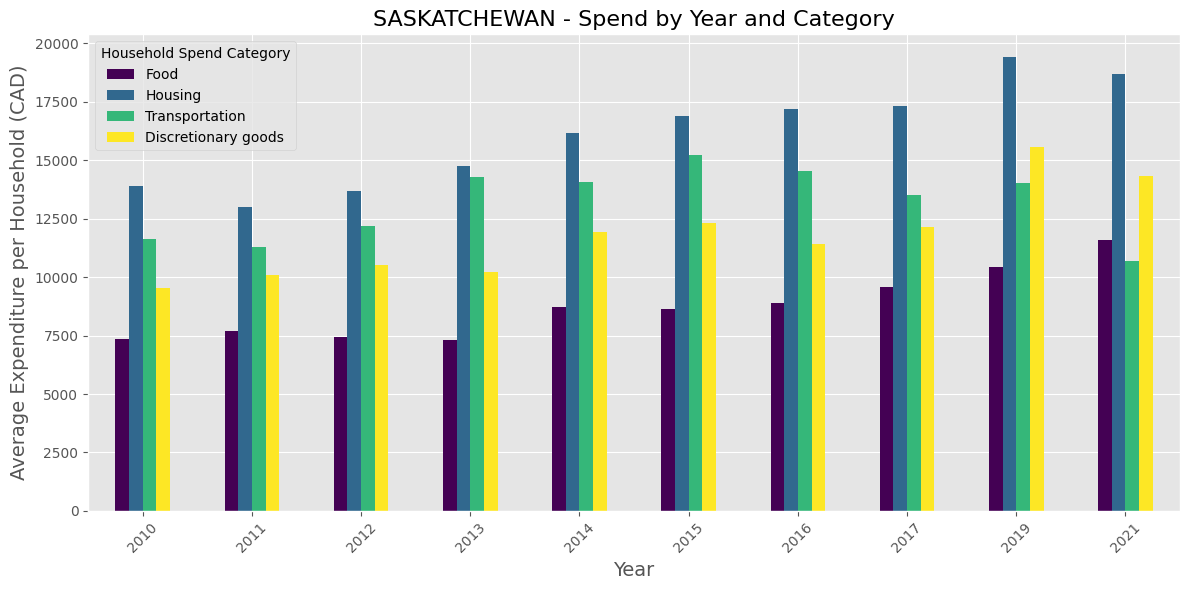

In [13]:
# Filter 'Spend: Category'
filtered_dataset_SK = dataset[dataset['Data Type'] == 'Spend: Category']

# Filter rows where 'Region' column is 'Saskatchewan'
filtered_dataset_SK = filtered_dataset_SK[filtered_dataset_SK['Region'] == 'Saskatchewan']

# Create pivot table
pivot_table_SK = pd.pivot_table(
    filtered_dataset_SK,
    values='Average expenditure per household (CAD)',
    index='Year',  
    columns='Household Spend Category',
    aggfunc='sum',
)

# Filter specific categories (Food, Housing, Transportation, Discretionary goods)
filtered_pivot_table_SK = pivot_table_SK[['Food', 'Housing', 'Transportation', 'Discretionary goods']]


# Reorder the columns in the specific order
column_order = ['Food', 'Housing', 'Transportation', 'Discretionary goods']
filtered_pivot_table_SK = filtered_pivot_table_SK[column_order]

# Print the final filtered pivot table
print("Filtered Pivot Table Saskatchewan Household Spend")
print(filtered_pivot_table_SK)

# Plot the bar chart
filtered_pivot_table_SK.plot(kind='bar', figsize=(12, 6), colormap='viridis')

# Customize the plot
plt.title('SASKATCHEWAN - Spend by Year and Category', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Expenditure per Household (CAD)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Household Spend Category', fontsize=10)

# Save the bar chart as an image file
plt.savefig('SK.png', format='png', dpi=300)

# Show the bar chart
plt.tight_layout()  # Adjust layout for better fit
plt.show()

 - In Saskatchewan, households primarily allocate their budgets to housing, closely followed by transportation and discretionary goods, with food spending remaining lower but steady.
 - Between 2010 and 2021, housing expenses saw consistent growth, although at a slower pace compared to other provinces. Food spending rose significantly, driven by higher prices. Transportation costs initially increased, then stabilized and declined, reflecting reduced travel during the pandemic. Discretionary spending peaked in 2019 before decreasing, signaling a shift toward prioritizing essential needs due to economic uncertainty.

### 7.5 Impact of Economic Factors ( Disposable Income and Consumer Price Index)

### 7.5.1 Alberta

    Year  Average expenditure per household (CAD)  Consumer Price Index  \
0   2010                                    89625            106.046575   
1   2011                                    89903            107.365278   
2   2012                                    97847            108.706757   
3   2013                                   101888            109.287324   
4   2014                                   100960            111.244286   
5   2015                                   110308            113.432877   
6   2016                                   106462            113.716418   
7   2017                                   101135            115.779412   
9   2019                                   113743            122.225000   
11  2021                                   104371            126.439706   

    Disposable income per household (CAD)  
0                                  108076  
1                                  110705  
2                                  116388 

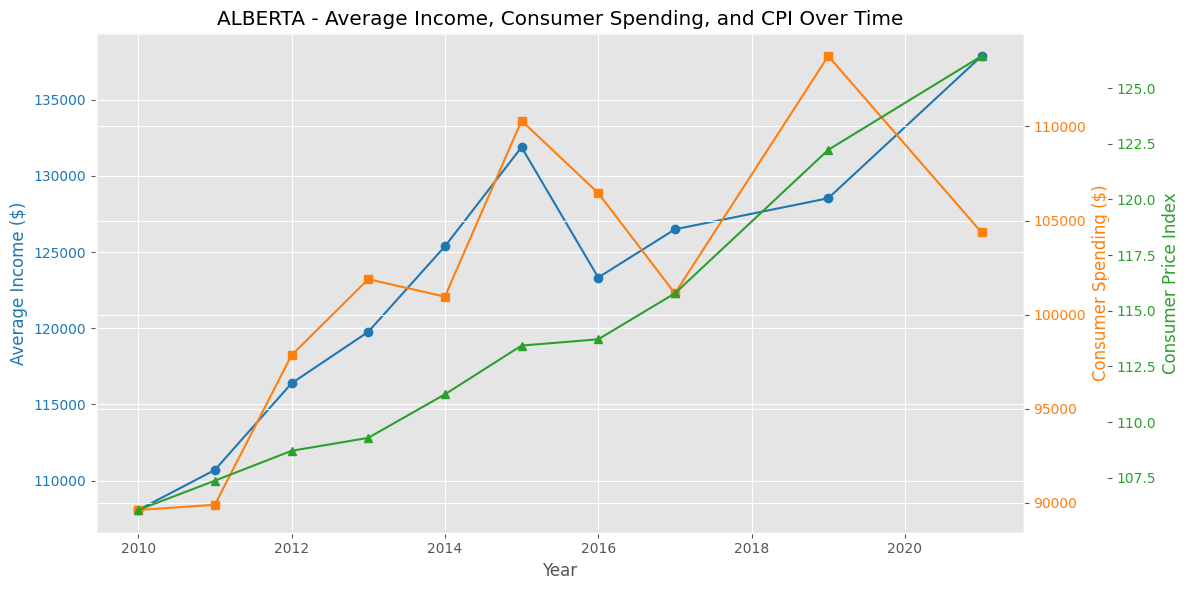

In [14]:
# Filter 'Spend: Category' and 'Income: All households' in the 'Data Type' column
filtered_dataset_Alberta = dataset[dataset['Data Type'].isin(['Spend: Category', 'Income: All households'])]

# Filter rows where 'Region' column contains 'Alberta'
filtered_dataset_Alberta = filtered_dataset_Alberta[filtered_dataset_Alberta['Region'] == 'Alberta']

# Create a pivot table for the Alberta Combo chart
pivot_table_Alberta = pd.pivot_table(
    filtered_dataset_Alberta,
    values=[
        'Average expenditure per household (CAD)', 
        'Disposable income per household (CAD)', 
        'Consumer Price Index',
    ],
    index='Year',
    aggfunc={
        'Average expenditure per household (CAD)': 'sum',
        'Disposable income per household (CAD)': 'sum',
        'Consumer Price Index': 'mean',
    }
)

# Reset the index to turn the index into a column
pivot_table_Alberta = pivot_table_Alberta.reset_index()

# Filter out the years 2018 and 2020 
pivot_table_Alberta = pivot_table_Alberta[~pivot_table_Alberta['Year'].isin([2018, 2020])]

print(pivot_table_Alberta)

# To create combo chart
df = pd.DataFrame(pivot_table_Alberta)

fig, ax1 = plt.subplots(figsize=(12, 6,))

# Plot Income on primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Income ($)', color='tab:blue')
ax1.plot(df['Year'], df['Disposable income per household (CAD)'], color='tab:blue', marker='o', label='Average Income')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for consumer spending
ax2 = ax1.twinx()
ax2.set_ylabel('Consumer Spending ($)', color='tab:orange')
ax2.plot(df['Year'], df['Average expenditure per household (CAD)'], color='tab:orange', marker='s', label='Consumer Spending')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Optional: Add CPI as a scatter plot
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis
ax3.set_ylabel('Consumer Price Index', color='tab:green')
ax3.plot(df['Year'], df['Consumer Price Index'], color='tab:green', marker='^', label='Inflation Rate')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Title and legend
plt.title('ALBERTA - Average Income, Consumer Spending, and CPI Over Time')
fig.tight_layout()  # To prevent overlap
plt.grid()
plt.show()

 - The line chart shows the relationship between Average Income, Consumer Spending, and CPI in Alberta from 2010 to 2021. 
 - Both Average Income and Consumer Spending exhibit an upward trend, with spending closely following income levels. 
 - There is a notable dip in Consumer Spending around 2016 and 2020, suggesting potential economic impacts during these years. 
 - The Consumer Price Index (CPI) shows a steady increase, indicating gradual inflation over time, which may have influenced both income and spending patterns.

### 7.5.2 British Columbia

Table for British Columbia
    Year  Average expenditure per household (CAD)  Consumer Price Index  \
0   2010                                    75051             99.756757   
1   2011                                    75446            101.948649   
2   2012                                    74764            103.011268   
3   2013                                    79082            102.850000   
4   2014                                    80673            102.946479   
5   2015                                    85704            104.515278   
6   2016                                    85820            106.642466   
7   2017                                    92691            108.515068   
9   2019                                   102924            115.458571   
11  2021                                   101374            118.217143   

    Disposable income per household (CAD)  
0                                   86242  
1                                   87630  
2              

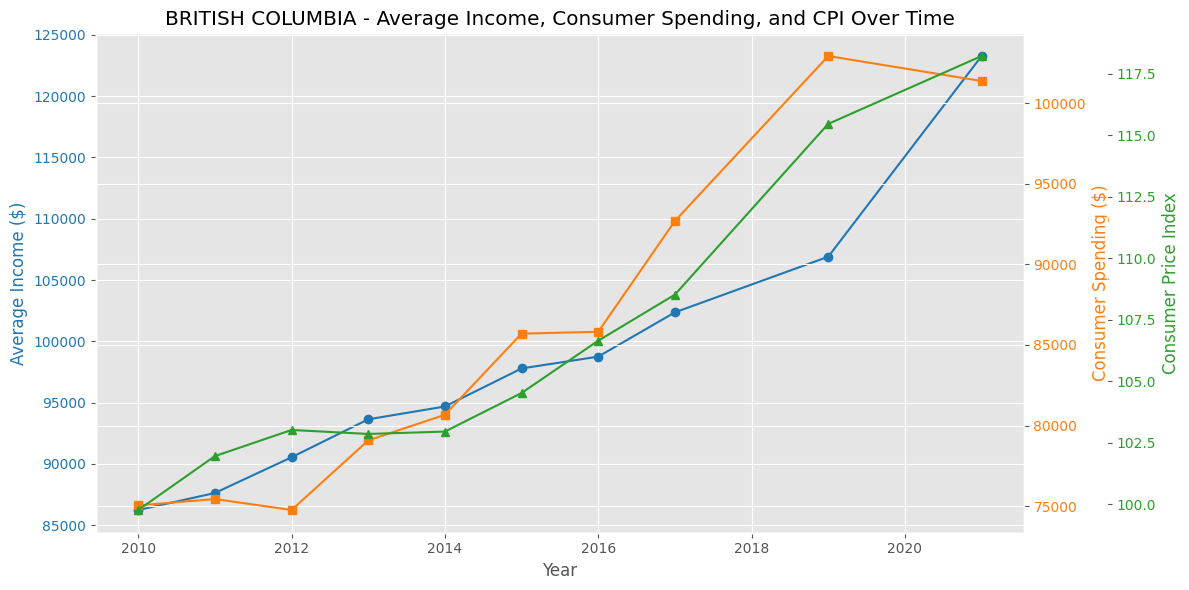

In [15]:
# Filter 'Spend: Category' and 'Income: All households' in the 'Data Type' column
filtered_dataset_bc = dataset[dataset['Data Type'].isin(['Spend: Category', 'Income: All households'])]

# Filter rows where 'Region' column is 'British Columbia'
filtered_dataset_bc = filtered_dataset_bc[filtered_dataset_bc['Region'] == 'British Columbia']

# Create a pivot table for British Columbia
pivot_table_british_columbia = pd.pivot_table(
    filtered_dataset_bc,
    values=[
        'Average expenditure per household (CAD)', 
        'Disposable income per household (CAD)', 
        'Consumer Price Index',
    ],
    index='Year',
    aggfunc={
        'Average expenditure per household (CAD)': 'sum',
        'Disposable income per household (CAD)': 'sum',
        'Consumer Price Index': 'mean',
    }
)
# Reset the index to turn the index into a column
pivot_table_british_columbia = pivot_table_british_columbia.reset_index()

# Filter out the years 2018 and 2020 
pivot_table_british_columbia = pivot_table_british_columbia[~pivot_table_british_columbia['Year'].isin([2018, 2020])]

# Print the final pivot table
print("Table for British Columbia")
print(pivot_table_british_columbia)

# To create combo chart
df = pd.DataFrame(pivot_table_british_columbia)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Income on primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Income ($)', color='tab:blue')
ax1.plot(df['Year'], df['Disposable income per household (CAD)'], color='tab:blue', marker='o', label='Average Income')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for consumer spending
ax2 = ax1.twinx()
ax2.set_ylabel('Consumer Spending ($)', color='tab:orange')
ax2.plot(df['Year'], df['Average expenditure per household (CAD)'], color='tab:orange', marker='s', label='Consumer Spending')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Optional: Add CPI as a scatter plot
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis
ax3.set_ylabel('Consumer Price Index', color='tab:green')
ax3.plot(df['Year'], df['Consumer Price Index'], color='tab:green', marker='^', label='Inflation Rate')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Title and legend
plt.title('BRITISH COLUMBIA - Average Income, Consumer Spending, and CPI Over Time')
fig.tight_layout()  # To prevent overlap
plt.grid()
plt.show()

 - In British Columbia, both Average Income and Consumer Spending show a consistent upward trend from 2010 to 2021. 
 - Consumer Spending closely follows the increase in Average Income, suggesting a positive correlation between income levels and household expenditure. 
 - The Consumer Price Index (CPI) also rises steadily, reflecting gradual inflation, which could impact purchasing power over time. 
 - The parallel growth in income and spending, along with inflation, indicates a stable economic environment where household expenditures increase in line with income growth. 

### 7.5.3 Ontario

Table for Ontario
    Year  Average expenditure per household (CAD)  Consumer Price Index  \
0   2010                                    75975            100.710526   
1   2011                                    77443            103.597403   
2   2012                                    79264            104.087671   
3   2013                                    82688            105.346575   
4   2014                                    84437            107.608219   
5   2015                                    85481            108.231169   
6   2016                                    89065            109.801333   
7   2017                                    90586            111.780822   
9   2019                                    98090            118.805882   
11  2021                                    98241            122.965278   

    Disposable income per household (CAD)  
0                                   90605  
1                                   92130  
2                       

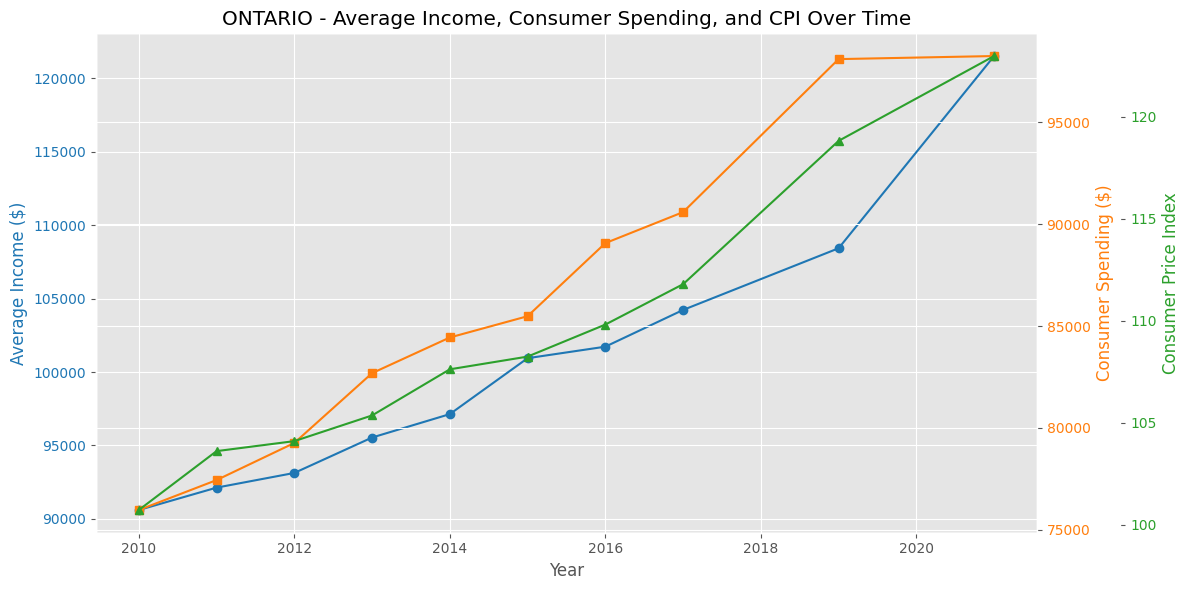

In [16]:
# Filter 'Spend: Category' and 'Income: All households' in the 'Data Type' column
filtered_dataset_Ontario = dataset[dataset['Data Type'].isin(['Spend: Category', 'Income: All households'])]

# Filter rows where 'Region' column is 'Ontario'
filtered_dataset_Ontario = filtered_dataset_Ontario[filtered_dataset_Ontario['Region'] == 'Ontario']

# Create a pivot table for Ontario
pivot_table_ontario = pd.pivot_table(
    filtered_dataset_Ontario,
    values=[
        'Average expenditure per household (CAD)', 
        'Disposable income per household (CAD)', 
        'Consumer Price Index',
    ],
    index='Year',
    aggfunc={
        'Average expenditure per household (CAD)': 'sum',
        'Disposable income per household (CAD)': 'sum',
        'Consumer Price Index': 'mean',
    }
)

# Reset the index to turn the index into a column
pivot_table_ontario = pivot_table_ontario.reset_index()

# Filter out the years 2018 and 2020 
pivot_table_ontario = pivot_table_ontario[~pivot_table_ontario['Year'].isin([2018, 2020])]

# Print the final pivot table
print("Table for Ontario")
print(pivot_table_ontario)

# To create combo chart
df = pd.DataFrame(pivot_table_ontario)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Income on primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Income ($)', color='tab:blue')
ax1.plot(df['Year'], df['Disposable income per household (CAD)'], color='tab:blue', marker='o', label='Average Income')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for consumer spending
ax2 = ax1.twinx()
ax2.set_ylabel('Consumer Spending ($)', color='tab:orange')
ax2.plot(df['Year'], df['Average expenditure per household (CAD)'], color='tab:orange', marker='s', label='Consumer Spending')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Optional: Add CPI as a scatter plot
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis
ax3.set_ylabel('Consumer Price Index', color='tab:green')
ax3.plot(df['Year'], df['Consumer Price Index'], color='tab:green', marker='^', label='Inflation Rate')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Title and legend
plt.title('ONTARIO - Average Income, Consumer Spending, and CPI Over Time')
fig.tight_layout()  # To prevent overlap
plt.grid()
plt.show()

 - In Ontario, the Average Income and Consumer Spending show a steady upward trend from 2010 to 2021. 
 - Consumer Spending increases in close alignment with Average Income, suggesting a positive relationship between income levels and household expenditures. 
 - The Consumer Price Index (CPI) also shows a gradual increase, indicating rising inflation over the years. 
 - This alignment indicates that as income levels rise, households are spending more, with inflation potentially influencing spending behaviors and purchasing power in Ontario.

### 7.5.4 Quebec

Table for Quebec
    Year  Average expenditure per household (CAD)  Consumer Price Index  \
0   2010                                    62878             97.816438   
1   2011                                    65152            100.837838   
2   2012                                    65236            102.822973   
3   2013                                    69072            103.473611   
4   2014                                    68961            103.991781   
5   2015                                    68197            105.045205   
6   2016                                    70739            105.661644   
7   2017                                    73558            106.474648   
9   2019                                    81073            113.004167   
11  2021                                    81733            117.440000   

    Disposable income per household (CAD)  
0                                   70406  
1                                   72058  
2                        

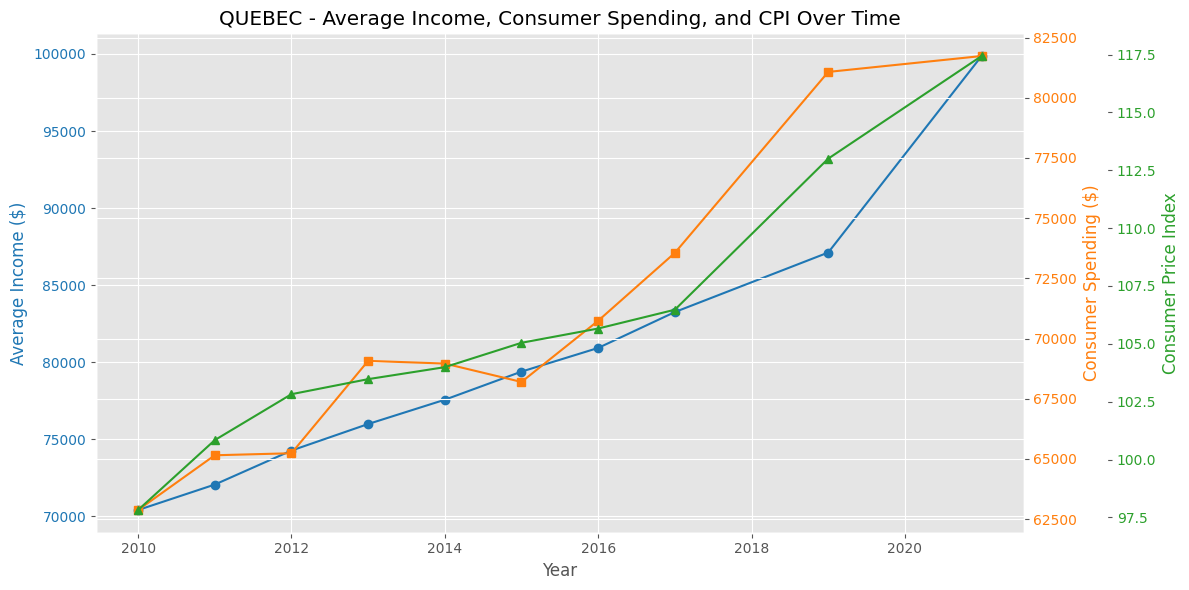

In [17]:
# Filter 'Spend: Category' and 'Income: All households' in the 'Data Type' column
filtered_dataset_Quebec = dataset[dataset['Data Type'].isin(['Spend: Category', 'Income: All households'])]

# Filter rows where 'Region' column is 'Quebec'
filtered_dataset_Quebec = filtered_dataset_Quebec[filtered_dataset_Quebec['Region'] == 'Quebec']

# Create a pivot table for Quebec
pivot_table_quebec = pd.pivot_table(
    filtered_dataset_Quebec,
    values=[
        'Average expenditure per household (CAD)', 
        'Disposable income per household (CAD)', 
        'Consumer Price Index',
    ],
    index='Year',
    aggfunc={
        'Average expenditure per household (CAD)': 'sum',
        'Disposable income per household (CAD)': 'sum',
        'Consumer Price Index': 'mean',
    }
)

# Reset the index to turn the index into a column
pivot_table_quebec = pivot_table_quebec.reset_index()

# Filter out the years 2018 and 2020 
pivot_table_quebec = pivot_table_quebec[~pivot_table_quebec['Year'].isin([2018, 2020])]

# Print the final pivot table
print("Table for Quebec")
print(pivot_table_quebec)

# To create combo chart
df = pd.DataFrame(pivot_table_quebec)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Income on primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Income ($)', color='tab:blue')
ax1.plot(df['Year'], df['Disposable income per household (CAD)'], color='tab:blue', marker='o', label='Average Income')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for consumer spending
ax2 = ax1.twinx()
ax2.set_ylabel('Consumer Spending ($)', color='tab:orange')
ax2.plot(df['Year'], df['Average expenditure per household (CAD)'], color='tab:orange', marker='s', label='Consumer Spending')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Optional: Add CPI as a scatter plot
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis
ax3.set_ylabel('Consumer Price Index', color='tab:green')
ax3.plot(df['Year'], df['Consumer Price Index'], color='tab:green', marker='^', label='Inflation Rate')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Title and legend
plt.title('QUEBEC - Average Income, Consumer Spending, and CPI Over Time')
fig.tight_layout()  # To prevent overlap
plt.grid()
plt.show()

 - In Ontario, the Average Income and Consumer Spending show a steady upward trend from 2010 to 2021. 
 - Consumer Spending increases in close alignment with Average Income, suggesting a positive relationship between income levels and household expenditures. 
 - The Consumer Price Index (CPI) also shows a gradual increase, indicating rising inflation over the years. 
 - This alignment indicates that as income levels rise, households are spending more, with inflation potentially influencing spending behaviors and purchasing power in Ontario.

### 7.5.5 Saskatchewan

Table for Saskatchewan
    Year  Average expenditure per household (CAD)  Consumer Price Index  \
0   2010                                    70826            102.634247   
1   2011                                    71125            103.821918   
2   2012                                    75473            105.342029   
3   2013                                    79768            107.365714   
4   2014                                    85024            109.973846   
5   2015                                    89737            110.717391   
6   2016                                    89234            111.654286   
7   2017                                    88346            114.188732   
9   2019                                    97446            121.235294   
11  2021                                    92307            122.246154   

    Disposable income per household (CAD)  
0                                   89724  
1                                   94718  
2                  

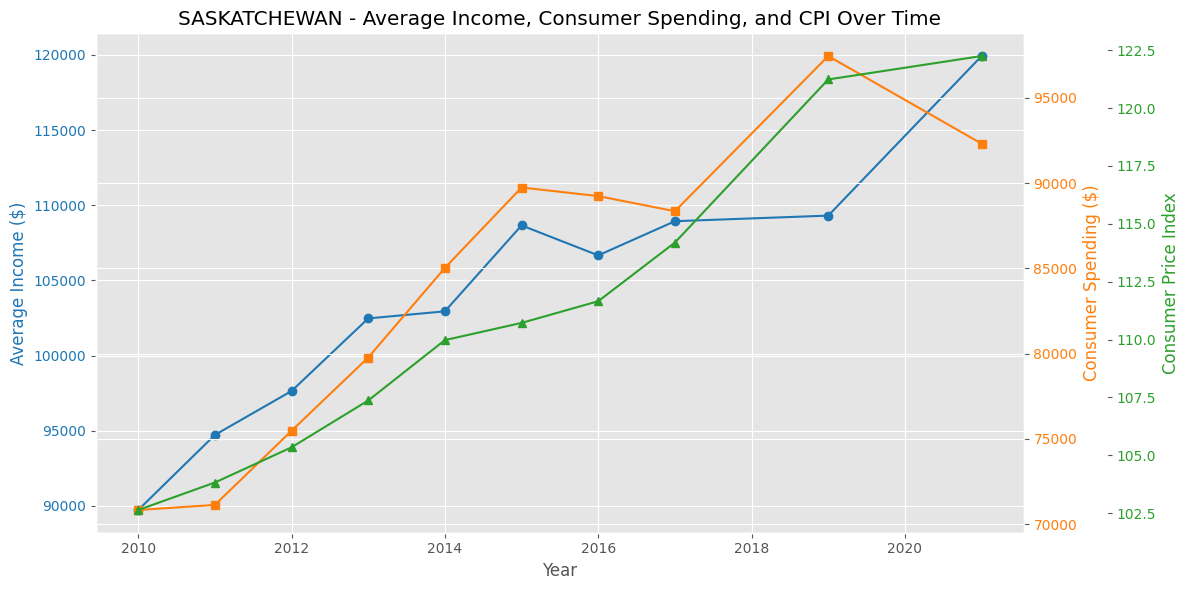

In [18]:
# Filter 'Spend: Category' and 'Income: All households' in the 'Data Type' column
filtered_dataset_saskatchewan = dataset[dataset['Data Type'].isin(['Spend: Category', 'Income: All households'])]

# Filter rows where 'Region' column is 'Saskatchewan'
filtered_dataset_saskatchewan = filtered_dataset_saskatchewan[filtered_dataset_saskatchewan['Region'] == 'Saskatchewan']

# Create a pivot table for Saskatchewan
pivot_table_saskatchewan = pd.pivot_table(
    filtered_dataset_saskatchewan,
    values=[
        'Average expenditure per household (CAD)', 
        'Disposable income per household (CAD)', 
        'Consumer Price Index',
    ],
    index='Year',
    aggfunc={
        'Average expenditure per household (CAD)': 'sum',
        'Disposable income per household (CAD)': 'sum',
        'Consumer Price Index': 'mean',
    }
)

# Reset the index to turn the index into a column
pivot_table_saskatchewan = pivot_table_saskatchewan.reset_index()

# Filter out the years 2018 and 2020 
pivot_table_saskatchewan = pivot_table_saskatchewan[~pivot_table_saskatchewan['Year'].isin([2018, 2020])]

# Print the final pivot table
print("Table for Saskatchewan")
print(pivot_table_saskatchewan)

# To create combo chart
df = pd.DataFrame(pivot_table_saskatchewan)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Income on primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Income ($)', color='tab:blue')
ax1.plot(df['Year'], df['Disposable income per household (CAD)'], color='tab:blue', marker='o', label='Average Income')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for consumer spending
ax2 = ax1.twinx()
ax2.set_ylabel('Consumer Spending ($)', color='tab:orange')
ax2.plot(df['Year'], df['Average expenditure per household (CAD)'], color='tab:orange', marker='s', label='Consumer Spending')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Optional: Add CPI as a scatter plot
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third y-axis
ax3.set_ylabel('Consumer Price Index', color='tab:green')
ax3.plot(df['Year'], df['Consumer Price Index'], color='tab:green', marker='^', label='Inflation Rate')
ax3.tick_params(axis='y', labelcolor='tab:green')

# Title and legend
plt.title('SASKATCHEWAN - Average Income, Consumer Spending, and CPI Over Time')
fig.tight_layout()  # To prevent overlap
plt.grid()
plt.show()

 - In Saskatchewan, Average Income and Consumer Spending have shown an upward trend from 2010 to 2021, with spending generally following income levels. 
 - Both indicators demonstrate consistent growth, reflecting a strong positive correlation between income and household expenditure. 
 - The Consumer Price Index (CPI) also steadily rises, indicating inflation's influence on purchasing power. 
 - Notably, there are fluctuations in Consumer Spending around 2016 and 2020, potentially due to economic or external factors. 
 - This trend indicates that income and inflation significantly impact household spending patterns in Saskatchewan.

### 7.6 Impact of Demographic Factors (Age Groups, Household Type and Income Quintile)

### 7.6.1 Age Groups

Filtered Pivot Table by Age Group and Household Spend Category
Household Spend Category      Food   Housing  Transportation  \
Less than 30 years         73288.0  162942.0        111870.0   
30 to 39 years             94019.0  209354.0        127737.0   
40 to 54 years            102291.0  210565.0        141691.0   
55 to 64 years             87273.0  162209.0        121484.0   
65 years and over          66121.0  118712.0         75182.0   

Household Spend Category  Discretionary goods  
Less than 30 years                    77762.0  
30 to 39 years                        97697.0  
40 to 54 years                       117883.0  
55 to 64 years                       115834.0  
65 years and over                     88681.0  


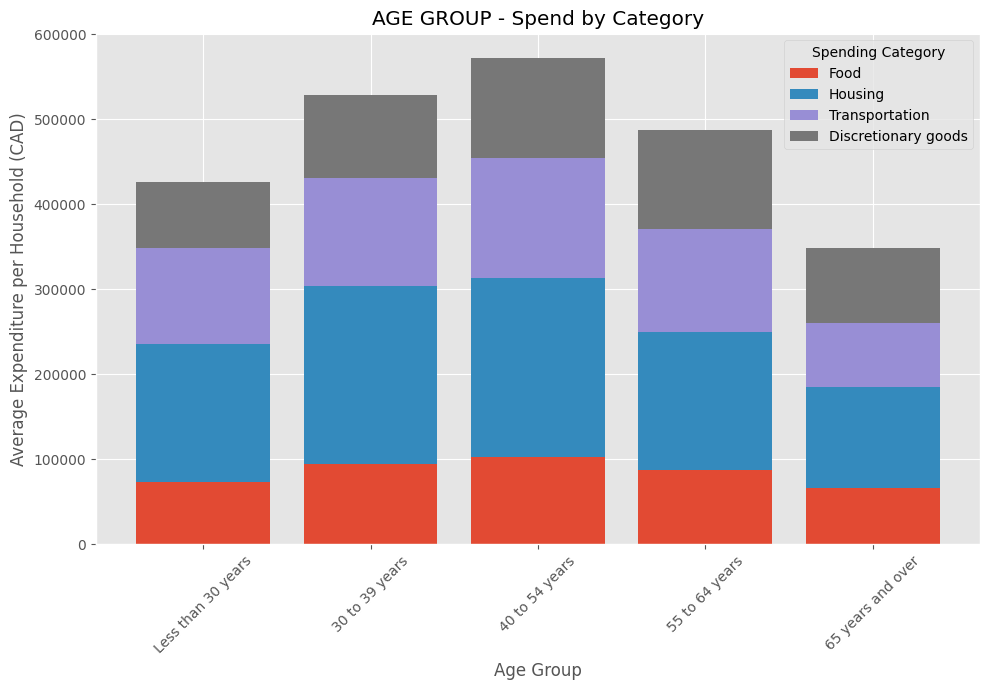

In [19]:
# Filter 'Spend: Age'
filtered_dataset_age = dataset[dataset['Data Type'] == 'Spend: Age']

# Filter rows where 'Region' column is 'Canada'
filtered_dataset_age = filtered_dataset_age[filtered_dataset_age['Region'] == 'Canada']

# Create pivot table
pivot_table_age = pd.pivot_table(
    filtered_dataset_age,
    values='Average expenditure per household (CAD)',
    index='Age Group', 
    columns='Household Spend Category', 
    aggfunc='sum',
    margins=True,  
    margins_name='Grand Total'
)

# Filter specific categories (Food, Housing, Transportation, Discretionary goods)
filtered_pivot_table_age = pivot_table_age[['Food', 'Housing', 'Transportation', 'Discretionary goods']]

# Filter out rows where index is 'All ages' or 'Grand Total'
filtered_pivot_table_age = filtered_pivot_table_age[~filtered_pivot_table_age.index.isin(['All ages', 'Grand Total'])]

# Reorder the age groups
desired_order = ['Less than 30 years', '30 to 39 years', '40 to 54 years', '55 to 64 years', '65 years and over']
filtered_pivot_table_age.index = pd.Categorical(filtered_pivot_table_age.index, categories=desired_order, ordered=True)
filtered_pivot_table_age = filtered_pivot_table_age.sort_index()

# Print the final filtered pivot table
print("Filtered Pivot Table by Age Group and Household Spend Category")
print(filtered_pivot_table_age)

# Define the age groups and spending categories
age_groups = filtered_pivot_table_age.index
categories = ['Food', 'Housing', 'Transportation', 'Discretionary goods']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 7))

# Initialize the bottom variable to keep track of the previous bars
bottom = None

# Loop through each category to create stacked bars
for category in categories:
    if bottom is None:
        ax.bar(age_groups, filtered_pivot_table_age[category], label=category)
        bottom = filtered_pivot_table_age[category]
    else:
        ax.bar(age_groups, filtered_pivot_table_age[category], bottom=bottom, label=category)
        bottom += filtered_pivot_table_age[category]

# Add labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Average Expenditure per Household (CAD)')
ax.set_title('AGE GROUP - Spend by Category')

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Add a legend to show which color represents which category
ax.legend(title='Spending Category')

# Display the plot
plt.tight_layout()
plt.show()

 - Across all age groups, housing consistently accounts for the largest share of expenditures, followed by transportation, with discretionary goods and food receiving smaller portions.
 - Spending begins at lower levels among younger households (under 30), reflecting limited financial resources and peaks among middle-aged households (30 to 54), driven by peak earning potential and larger family responsibilities, then declines all categories for older households (55 and above), particularly in transportation and discretionary goods, as mobility needs and consumption priorities shift towards essentials. Housing remains a major expense but is lower compared to younger households, likely due to reduced mortgage obligations or downsizing.
 - It is concluded that spending patterns align with life stages, with younger households focusing on mobility and older households shifting toward essential needs.

### 7.6.2 Household Type

Filtered Pivot Table by Household Type and Household Spend Category
Household Spend Category                             Food   Housing  \
Single person                                     47096.0  118851.0   
Lone-parent  with no additional persons           79051.0  152262.0   
Couples without children                          87970.0  164262.0   
Couples with children                            122240.0  234674.0   
Couples with other related or unrelated persons  119600.0  242979.0   

Household Spend Category                         Transportation  \
Single person                                           55067.0   
Lone-parent  with no additional persons                 90894.0   
Couples without children                               121047.0   
Couples with children                                  169657.0   
Couples with other related or unrelated persons        187148.0   

Household Spend Category                         Discretionary goods  
Single person                  

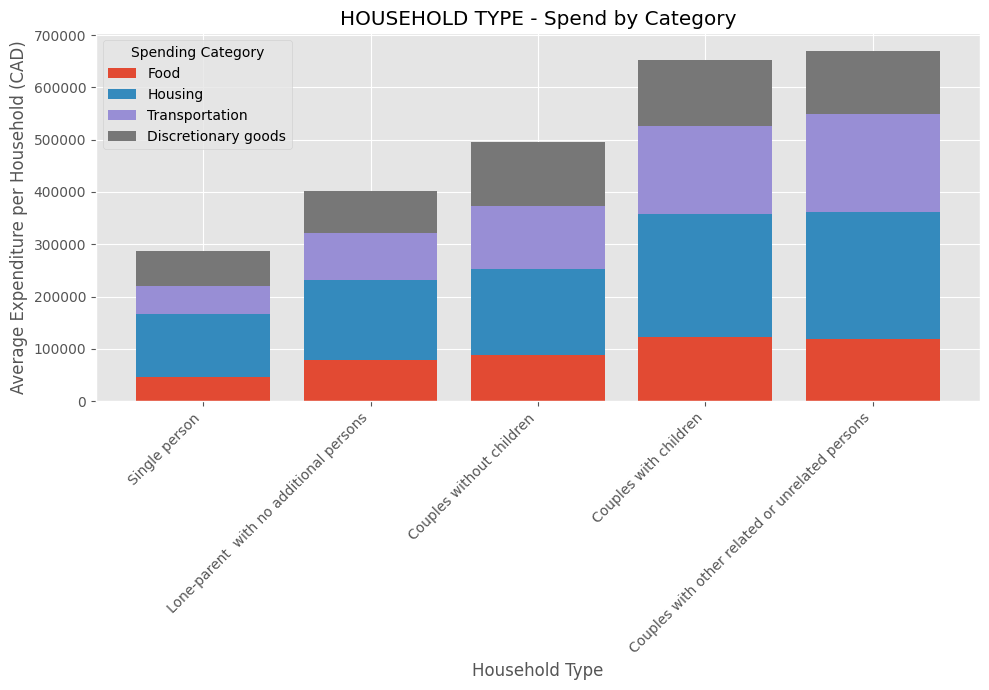

In [20]:
# Filter 'Spend: Household Type'
filtered_dataset_household_type = dataset[dataset['Data Type'] == 'Spend: Household Type']

# Filter rows where 'Region' column is 'Canada'
filtered_dataset_household_type = filtered_dataset_household_type[filtered_dataset_household_type['Region'] == 'Canada']

# Create pivot table
pivot_table_household_type = pd.pivot_table(
    filtered_dataset_household_type,
    values='Average expenditure per household (CAD)',
    index='Household Type',  
    columns='Household Spend Category', 
    aggfunc='sum',
    margins=True,  # Add the Grand Total row/column
    margins_name='Grand Total'
)

# Filter specific categories (Food, Housing, Transportation, Discretionary goods)
filtered_pivot_table_household_type = pivot_table_household_type[['Food', 'Housing', 'Transportation', 'Discretionary goods']]

# Filter out rows where index is 'All types' or 'Grand Total'
filtered_pivot_table_household_type = filtered_pivot_table_household_type[~filtered_pivot_table_household_type.index.isin(['All types', 'Grand Total', 'Others  with related or unrelated persons'])]

# Reorder the household type
desired_order = ['Single person', 'Lone-parent  with no additional persons', 'Couples without children', 'Couples with children', 'Couples with other related or unrelated persons']
filtered_pivot_table_household_type.index = pd.Categorical(filtered_pivot_table_household_type.index, categories=desired_order, ordered=True)
filtered_pivot_table_household_type = filtered_pivot_table_household_type.sort_index()

# Print the final filtered pivot table
print("Filtered Pivot Table by Household Type and Household Spend Category")
print(filtered_pivot_table_household_type)

# Define the household type and spending categories
household_type = filtered_pivot_table_household_type.index
categories = ['Food', 'Housing', 'Transportation', 'Discretionary goods']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 7))

# Initialize the bottom variable to keep track of the previous bars
bottom = None

# Loop through each category to create stacked bars
for category in categories:
    if bottom is None:
        ax.bar(household_type, filtered_pivot_table_household_type[category], label=category)
        bottom = filtered_pivot_table_household_type[category]
    else:
        ax.bar(household_type, filtered_pivot_table_household_type[category], bottom=bottom, label=category)
        bottom += filtered_pivot_table_household_type[category]

# Add labels and title
ax.set_xlabel('Household Type')
ax.set_ylabel('Average Expenditure per Household (CAD)')
ax.set_title('HOUSEHOLD TYPE - Spend by Category')

# Rotate x-ticks for better readability and align them
plt.xticks(rotation=45, ha='right')  # ha='right' aligns the text to the right

# Add a legend to show which color represents which category
ax.legend(title='Spending Category')

# Display the plot
plt.tight_layout()
plt.show()



 - It is clearly seen that, As household size and complexity grow, spending rises accordingly. 
 - Couples with children and households that include additional members face the highest expenses across all categories. 
 - Housing is consistently the largest expense, while discretionary spending varies based on the household's composition and priorities. This is especially noticeable in single-person households, where discretionary spending exceeds both transportation and food costs.

### 7.6.3 Income Quintile

Filtered Pivot Table by Income Quintile and Household Spend Category
Household Spend Category      Food   Housing  Transportation  \
Lowest quintile            47847.0  104030.0         46715.0   
Second quintile            66134.0  128882.0         75577.0   
Third quintile             82556.0  160192.0        111205.0   
Fourth quintile           102236.0  201402.0        145047.0   
Highest quintile          132647.0  275463.0        203500.0   

Household Spend Category  Discretionary goods  
Lowest quintile                       44371.0  
Second quintile                       66622.0  
Third quintile                        91929.0  
Fourth quintile                      121434.0  
Highest quintile                     190921.0  


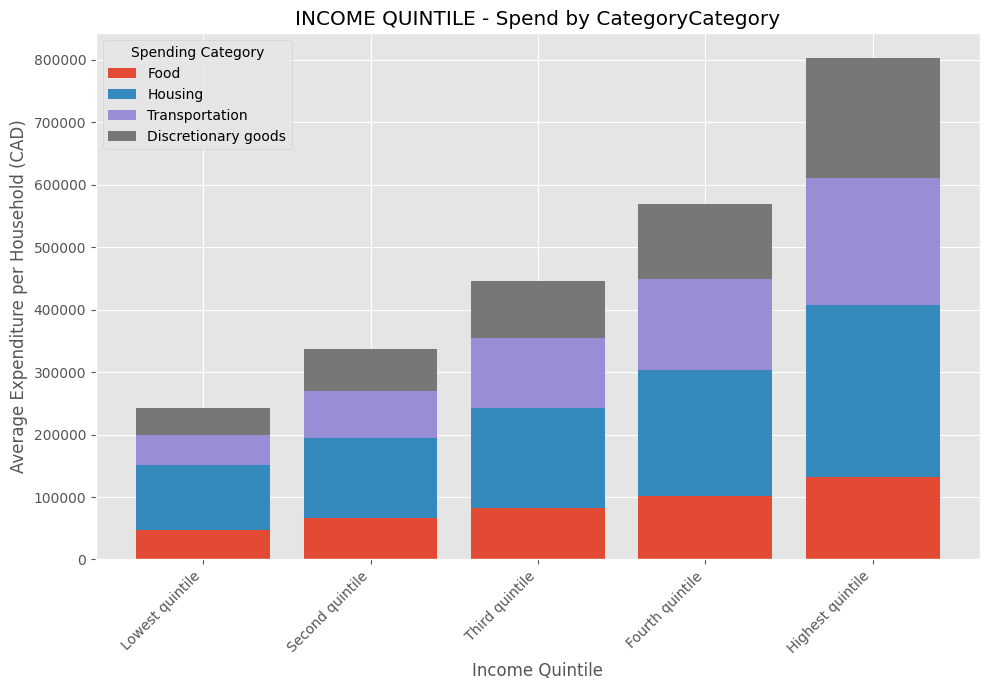

In [21]:
# Filter 'Spend: Income Quintile'
filtered_dataset_income_quintile = dataset[dataset['Data Type'] == 'Spend: Income Quintile']

# Filter rows where 'Region' column is 'Canada'
filtered_dataset_income_quintile = filtered_dataset_income_quintile[filtered_dataset_income_quintile['Region'] == 'Canada']

# Create pivot table
pivot_table_income_quintile = pd.pivot_table(
    filtered_dataset_income_quintile,
    values='Average expenditure per household (CAD)',
    index='Income Quintile',  
    columns='Household Spend Category', 
    aggfunc='sum',
    margins=True,  # Add the Grand Total row/column
    margins_name='Grand Total'
)

# Filter specific categories (Food, Housing, Transportation, Discretionary goods)
filtered_pivot_table_income_quintile = pivot_table_income_quintile[['Food', 'Housing', 'Transportation', 'Discretionary goods']]

# Filter out rows where index is 'All quintiles' or 'Grand Total'
filtered_pivot_table_income_quintile = filtered_pivot_table_income_quintile[~filtered_pivot_table_income_quintile.index.isin(['All quintiles', 'Grand Total'])]

# Reorder the income quintile
desired_order = [
    'Lowest quintile',
    'Second quintile',
    'Third quintile',
    'Fourth quintile',
    'Highest quintile',
]

# Set the index as a categorical variable with the specified order
filtered_pivot_table_income_quintile.index = pd.Categorical(
    filtered_pivot_table_income_quintile.index,
    categories=desired_order,
    ordered=True
)
filtered_pivot_table_income_quintile = filtered_pivot_table_income_quintile.sort_index()

# Print the final filtered pivot table
print("Filtered Pivot Table by Income Quintile and Household Spend Category")
print(filtered_pivot_table_income_quintile)

# Define the income quintile and spending categories
income_quintile = filtered_pivot_table_income_quintile.index
categories = ['Food', 'Housing', 'Transportation', 'Discretionary goods']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 7))

# Initialize the bottom variable to keep track of the previous bars
bottom = None

# Loop through each category to create stacked bars
for category in categories:
    if bottom is None:
        ax.bar(income_quintile, filtered_pivot_table_income_quintile[category], label=category)
        bottom = filtered_pivot_table_income_quintile[category]
    else:
        ax.bar(income_quintile, filtered_pivot_table_income_quintile[category], bottom=bottom, label=category)
        bottom += filtered_pivot_table_income_quintile[category]

# Add labels and title
ax.set_xlabel('Income Quintile')
ax.set_ylabel('Average Expenditure per Household (CAD)')
ax.set_title('INCOME QUINTILE - Spend by CategoryCategory')

# Rotate x-ticks for better readability and align them
plt.xticks(rotation=45, ha='right')  # ha='right' aligns the text to the right

# Add a legend to show which color represents which category
ax.legend(title='Spending Category')

# Display the plot
plt.tight_layout()
plt.show()

 - As income increases from the Lowest Quintile to the Highest Quintile, total household expenditure also rises significantly. This trend suggests that higher income levels enable greater spending flexibility across all categories. 
 - Housing consistently has the largest share of spending across all income levels, followed by Transportation, Discretionary Goods and Food. 
 - Higher-income households allocate more to Discretionary Goods compared to lower-income households, indicating a greater capacity for non-essential spending as income increases.
 - Lower-income households, on the other hand,  focus more on basic needs, with their spending on food and housing consuming a larger share of their total budget.                                                                                                                                                                                                                                                                  

### 7.7 Regional Differences on Household Spending

### 7.7.1 Food

Table for Food
Region  Alberta  British Columbia  Ontario  Quebec  Saskatchewan
Year                                                            
2010       8887              8732     7737    7409          7369
2011       8559              8121     7799    7455          7691
2012       8457              8438     7463    7715          7428
2013       9328              8118     7751    7892          7331
2014       8740              8218     8103    7771          8708
2015      10170              9168     8475    8155          8618
2016       9766              9139     8747    8474          8888
2017       9864              9735     9099    8199          9584
2019      11322             10639    10419    9847         10428
2021      11808             11283     9794    9670         11595


<Figure size 1200x600 with 0 Axes>

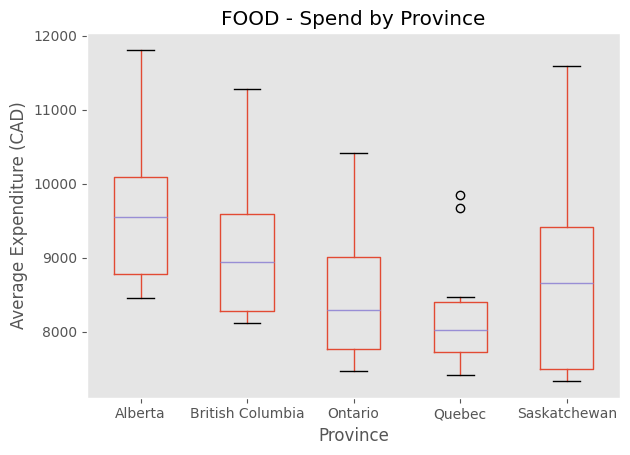

In [22]:
# 2.5 Regional Differences on Household Spending

# 2.5.1 FOOD EXPENDITURE - Regional Differences

# Filter 'Spend: Category'
filtered_data_food = dataset[dataset['Data Type'] == 'Spend: Category']

# Filter rows where 'Household Spend Category' column is 'Food'
filtered_data_food = filtered_data_food[filtered_data_food['Household Spend Category'] == 'Food']

# Create a pivot table for the average expenditures by province and year
pivot_table_food = pd.pivot_table(
    filtered_data_food,
    values='Average expenditure per household (CAD)',
    index='Year',  
    columns='Region',  
    aggfunc='sum' 
)
# Filter specific provinces (Alberta, BC, Ontario, Quebec, Saskatchewan)
filtered_pivot_table_food = pivot_table_food[['Alberta', 'British Columbia', 'Ontario', 'Quebec', 'Saskatchewan']]

# Print the final table for Food
print("Table for Food")
print(filtered_pivot_table_food)

# Reset the index to convert 'Year' from index to a column
filtered_pivot_table_food.reset_index(inplace=True)

# Melt the DataFrame to long format for plotting
df_melted = filtered_pivot_table_food.melt(id_vars=['Year'], var_name='Region', value_name='Average expenditure per household (CAD)')

# Create the box plot
plt.figure(figsize=(12, 6))
df_melted.boxplot(column='Average expenditure per household (CAD)', by='Region', grid=False, showfliers=True)

# Customize the plot
plt.title('FOOD - Spend by Province')
plt.suptitle('')  # Remove automatic "Boxplot grouped by" title
plt.xlabel('Province')
plt.ylabel('Average Expenditure (CAD)')

# Save the box plot as an image file
plt.savefig('food_expenditure_boxplot.png', format='png', dpi=300)

# Show the box plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

 - Alberta and Saskatchewan show a higher median food expenditure and wider variability, indicating a greater range in spending levels within these provinces likely due to factors like income variations, economic cycles, regional cost-of-living differences, and lifestyle choices.
 - British Columbia and Ontario have moderate food spending levels with less variability reflecting stable economies, higher average incomes, and urbanized populations while Quebec exhibits the lowest median food expenditure with relatively tight distribution, suggesting more consistent spending patterns resulting from a more conservative spending culture, lower cost of living, and regional economic conditions. 
 - The presence of outliers in some provinces, such as Quebec, may indicate occasional deviations from typical spending trends.

### 7.7.2 Housing

Table for Housing
Region  Alberta  British Columbia  Ontario  Quebec  Saskatchewan
Year                                                            
2010      17415             16954    16717   12022         13880
2011      18618             16625    16880   12186         13015
2012      19227             18221    17132   12564         13686
2013      19397             18888    18039   12782         14742
2014      20486             18462    19408   13186         16182
2015      21600             19923    19198   13475         16914
2016      21314             19405    20388   13972         17215
2017      20970             21757    20776   14555         17307
2019      22410             23874    22040   15822         19419
2021      23050             24596    24100   15847         18705


<Figure size 1200x600 with 0 Axes>

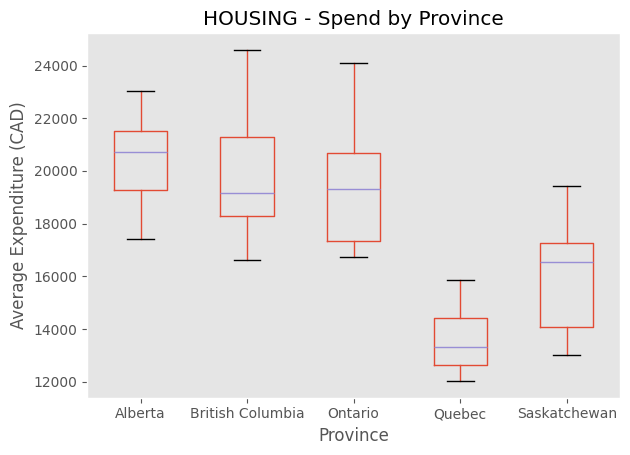

In [23]:
# Filter 'Spend: Category'
filtered_data_housing = dataset[dataset['Data Type'] == 'Spend: Category']

# Filter rows where 'Household Spend Category' column is 'Housing'
filtered_data_housing = filtered_data_housing[filtered_data_housing['Household Spend Category'] == 'Housing']

# Create a pivot table for the average expenditures by province and year
pivot_table_housing = pd.pivot_table(
    filtered_data_housing,
    values='Average expenditure per household (CAD)',
    index='Year',  
    columns='Region',  
    aggfunc='sum' 
)
# Filter specific provinces (Alberta, BC, Ontario, Quebec, Saskatchewan)
filtered_pivot_table_housing = pivot_table_housing[['Alberta', 'British Columbia', 'Ontario', 'Quebec', 'Saskatchewan']]

# Print the final table for Housing
print("Table for Housing")
print(filtered_pivot_table_housing)

# Reset the index to convert 'Year' from index to a column
filtered_pivot_table_housing.reset_index(inplace=True)

# Melt the DataFrame to long format for plotting
df_melted = filtered_pivot_table_housing.melt(id_vars=['Year'], var_name='Region', value_name='Average expenditure per household (CAD)')

# Create the box plot
plt.figure(figsize=(12, 6))
df_melted.boxplot(column='Average expenditure per household (CAD)', by='Region', grid=False, showfliers=True)

# Customize the plot
plt.title('HOUSING - Spend by Province')
plt.suptitle('')  # Remove automatic "Boxplot grouped by" title
plt.xlabel('Province')
plt.ylabel('Average Expenditure (CAD)')

# Save the box plot as an image file
plt.savefig('housing_expenditure_boxplot.png', format='png', dpi=300)

# Show the box plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

 - Ontario and Alberta have the highest median housing expenditures, with Ontario showing a slightly wider variability in spending. 
 - British Columbia also has relatively high housing costs with moderate variability. 
 - In contrast, Quebec exhibits the lowest median housing expenditure with a tightly clustered distribution, indicating more consistent spending on housing. 
 - Saskatchewan shows moderate housing expenditures with a slightly broader range. 
 - This plot highlights significant regional differences in housing spending, with Ontario, Alberta, and British Columbia generally spending more on housing than Quebec and Saskatchewan.

### 7.7.3 Transportation

Table for Transportation
Region  Alberta  British Columbia  Ontario  Quebec  Saskatchewan
Year                                                            
2010      12857             11267    11646    9956         11616
2011      13763             11046    11264   10365         11292
2012      14680             10448    11470    9476         12171
2013      15196             11298    12078   10719         14285
2014      15402             11464    11713   10358         14051
2015      16799             12012    11813    9063         15237
2016      15317             12079    12347    9619         14522
2017      15465             13942    13099   10134         13522
2019      15630             14259    12830   10493         14038
2021      11064             10870     9825    9408         10708


<Figure size 1200x600 with 0 Axes>

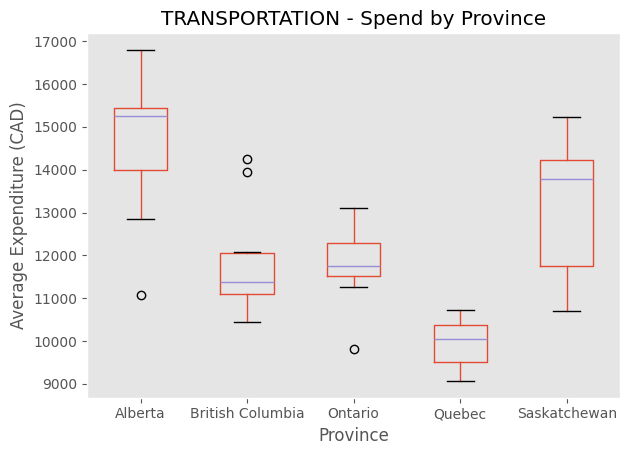

In [24]:
# Filter 'Spend: Category'
filtered_data_transpo = dataset[dataset['Data Type'] == 'Spend: Category']

# Filter rows where 'Household Spend Category' column is 'Transportation'
filtered_data_transpo = filtered_data_transpo[filtered_data_transpo['Household Spend Category'] == 'Transportation']

# Create a pivot table for the average expenditures by province and year
pivot_table_transpo = pd.pivot_table(
    filtered_data_transpo,
    values='Average expenditure per household (CAD)',
    index='Year',  
    columns='Region',  
    aggfunc='sum' 
)
# Filter specific provinces (Alberta, BC, Ontario, Quebec, Saskatchewan)
filtered_pivot_table_transpo = pivot_table_transpo[['Alberta', 'British Columbia', 'Ontario', 'Quebec', 'Saskatchewan']]

# Print the final table for Transportation
print("Table for Transportation")
print(filtered_pivot_table_transpo)

# Reset the index to convert 'Year' from index to a column
filtered_pivot_table_transpo.reset_index(inplace=True)

# Melt the DataFrame to long format for plotting
df_melted = filtered_pivot_table_transpo.melt(id_vars=['Year'], var_name='Region', value_name='Average expenditure per household (CAD)')

# Create the box plot
plt.figure(figsize=(12, 6))
df_melted.boxplot(column='Average expenditure per household (CAD)', by='Region', grid=False, showfliers=True)

# Customize the plot
plt.title('TRANSPORTATION - Spend by Province')
plt.suptitle('')  # Remove automatic "Boxplot grouped by" title
plt.xlabel('Province')
plt.ylabel('Average Expenditure (CAD)')

# Save the box plot as an image file
plt.savefig('transpo_expenditure_boxplot.png', format='png', dpi=300)

# Show the box plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

 - Alberta shows the highest median transportation spending with significant variability, indicating a broad range of transportation costs within the province. 
 - Saskatchewan also has relatively high transportation spending with a wide distribution, suggesting varying costs across households. 
 - British Columbia, Ontario, and Quebec have lower median expenditures on transportation, with Quebec showing the lowest levels and the least variability. 
 - The presence of outliers in British Columbia and Ontario indicates occasional deviations in spending, possibly due to specific high-cost cases. 
 - This plot highlights regional differences, with Alberta and Saskatchewan generally spending more on transportation compared to other provinces.

### 7.7.4 Discretionary Goods

Table for Discretionary Goods
Region  Alberta  British Columbia  Ontario  Quebec  Saskatchewan
Year                                                            
2010      11370              9507     8664    7204          9532
2011      12385             10041     9529    7635         10088
2012      12836              8915     9453    7319         10533
2013      13458              9960    10127    7977         10236
2014      12746             10804     9647    7858         11921
2015      13412             11132    10502    7643         12311
2016      12719             11167    10665    8230         11404
2017      12485             11189    11207    8855         12148
2019      16994             15944    12750   10802         15557
2021      13134             13841    12113   10621         14326


<Figure size 1200x600 with 0 Axes>

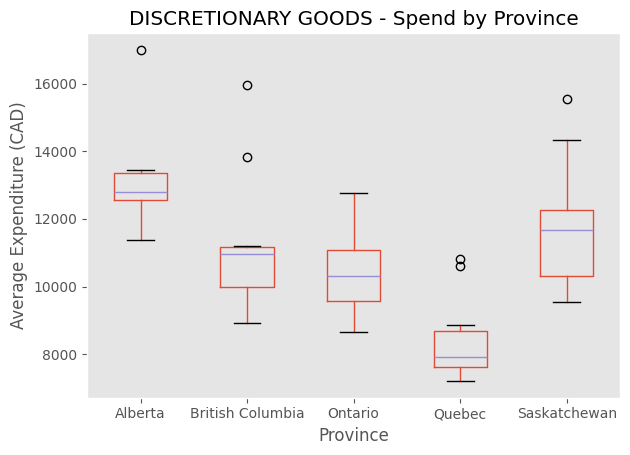

In [25]:
# Filter 'Spend: Category'
filtered_data_dg = dataset[dataset['Data Type'] == 'Spend: Category']

# Filter rows where 'Household Spend Category' column is 'Transportation'
filtered_data_dg = filtered_data_dg[filtered_data_dg['Household Spend Category'] == 'Discretionary goods']

# Create a pivot table for the average expenditures by province and year
pivot_table_dg = pd.pivot_table(
    filtered_data_dg,
    values='Average expenditure per household (CAD)',
    index='Year',  
    columns='Region',  
    aggfunc='sum' 
)
# Filter specific provinces (Alberta, BC, Ontario, Quebec, Saskatchewan)
filtered_pivot_table_dg = pivot_table_dg[['Alberta', 'British Columbia', 'Ontario', 'Quebec', 'Saskatchewan']]

# Print the final table for Transportation
print("Table for Discretionary Goods")
print(filtered_pivot_table_dg)

# Reset the index to convert 'Year' from index to a column
filtered_pivot_table_dg.reset_index(inplace=True)

# Melt the DataFrame to long format for plotting
df_melted = filtered_pivot_table_dg.melt(id_vars=['Year'], var_name='Region', value_name='Average expenditure per household (CAD)')

# Create the box plot
plt.figure(figsize=(12, 6))
df_melted.boxplot(column='Average expenditure per household (CAD)', by='Region', grid=False, showfliers=True)

# Customize the plot
plt.title('DISCRETIONARY GOODS - Spend by Province')
plt.suptitle('')  # Remove automatic "Boxplot grouped by" title
plt.xlabel('Province')
plt.ylabel('Average Expenditure (CAD)')

# Save the box plot as an image file
plt.savefig('transpo_expenditure_boxplot.png', format='png', dpi=300)

# Show the box plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

 - Alberta and Saskatchewan show higher median spending on discretionary goods, with a broad range and multiple outliers, indicating diverse spending habits within these provinces. 
 - British Columbia and Ontario have moderate spending levels with less variability, while Quebec has the lowest median expenditure and a tight distribution, suggesting more conservative spending on discretionary goods. 
 - The presence of outliers in Alberta, British Columbia, and Saskatchewan indicates instances of higher-than-average spending. 
 - This variation highlights regional differences in discretionary spending, with Alberta and Saskatchewan allocating more to non-essential goods compared to other provinces.

### 8  PREDICTIVE MODEL FITTING, EVALUATION AND SELECTION

### 8.1 Data Transformation and Pre-processing

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Filter 'Spend: Income Quintile' and 'Income: Income quintile' in the 'Data Type' column
filtered_data_model_fitting = dataset[dataset['Data Type'].isin(['Spend: Income Quintile', 'Income: Income quintile'])]

# Filter out 'All quintiles' from the 'Income Quintile' column
filtered_data_model_fitting = filtered_data_model_fitting[~filtered_data_model_fitting['Income Quintile'].str.strip().isin(['All quintiles'])]

# Filter out the years 2010, 2018, 2019, 2020, 2021
filtered_data_model_fitting = filtered_data_model_fitting[~filtered_data_model_fitting['Year'].isin([2010, 2018, 2019, 2020, 2021])]

# Create a pivot table
pivot_table_model_fitting = pd.pivot_table(filtered_data_model_fitting,
    values=['Average expenditure per household (CAD)', 'Consumer Price Index', 'Disposable income per household (CAD)'],
    index=['Year', 'Region', 'Income Quintile'],
    aggfunc={'Average expenditure per household (CAD)': 'sum',
             'Disposable income per household (CAD)': 'sum',
             'Consumer Price Index': 'sum'})

# Filter specific provinces (Alberta, BC, Ontario, Quebec, Saskatchewan)
filtered_pivot_table_model_fitting = pivot_table_model_fitting.loc[
    pivot_table_model_fitting.index.get_level_values('Region').isin(['Alberta', 'British Columbia', 'Ontario', 'Quebec', 'Saskatchewan'])
]
print(f"After data transformation: {filtered_pivot_table_model_fitting.shape[0]} rows and {filtered_pivot_table_model_fitting.shape[1]} columns")

# Check the input variables in the filtered pivot table
filtered_pivot_table_model_fitting.head()


After data transformation: 175 rows and 3 columns


Average expenditure per household (CAD)  \
Year Region  Income Quintile                                             
2011 Alberta Fourth quintile                                    102306   
             Highest quintile                                   158893   
             Lowest quintile                                     34015   
             Second quintile                                     59249   
             Third quintile                                      75507   

                               Consumer Price Index  \
Year Region  Income Quintile                          
2011 Alberta Fourth quintile                 5942.2   
             Highest quintile                6488.5   
             Lowest quintile                 5199.9   
             Second quintile                 5860.4   
             Third quintile                  5693.0   

                               Disposable income per household (CAD)  
Year Region  Income Quintile                                          
2011 Alberta Fourth quintile                                   80788  
             Highest quintile                                 149664  
             Lowest quintile                                   21996  
             Second quintile                                   43371  
             Third quintile                                    57370

### 8.1.1  One-Hot Encoding of Categorical Variables

In [27]:

# Reset the index of the pivot table to prepare for one-hot encoding
pivot_table_reset = filtered_pivot_table_model_fitting.reset_index()

# One-hot encoding categorical variables
encoded_data = pd.get_dummies(pivot_table_reset[['Year', 'Region', 'Income Quintile']], drop_first=True)

# Concatenating encoded data with numerical columns
encoded_data = pd.concat([encoded_data, pivot_table_reset[['Average expenditure per household (CAD)', 
                                                          'Consumer Price Index', 
                                                          'Disposable income per household (CAD)']]], axis=1)

# Ensuring all columns are numeric
encoded_data = encoded_data.apply(pd.to_numeric, errors='coerce')

# Dropping rows with NaN values
encoded_data = encoded_data.dropna()

# Checking columns of encoded_data
print("Columns in encoded_data after one-hot encoding:")
print(encoded_data.columns.tolist())

# Get the number of rows and columns in your dataset
num_rows, num_features = encoded_data.shape

print(f"Number of rows: {num_rows}")
print(f"Number of features (columns): {num_features}")

Columns in encoded_data after one-hot encoding:
['Year', 'Region_British Columbia', 'Region_Ontario', 'Region_Quebec', 'Region_Saskatchewan', 'Income Quintile_Highest quintile', 'Income Quintile_Lowest quintile', 'Income Quintile_Second quintile', 'Income Quintile_Third quintile', 'Average expenditure per household (CAD)', 'Consumer Price Index', 'Disposable income per household (CAD)']
Number of rows: 175
Number of features (columns): 12


### 8.1.2  Outlier Detection and Handling

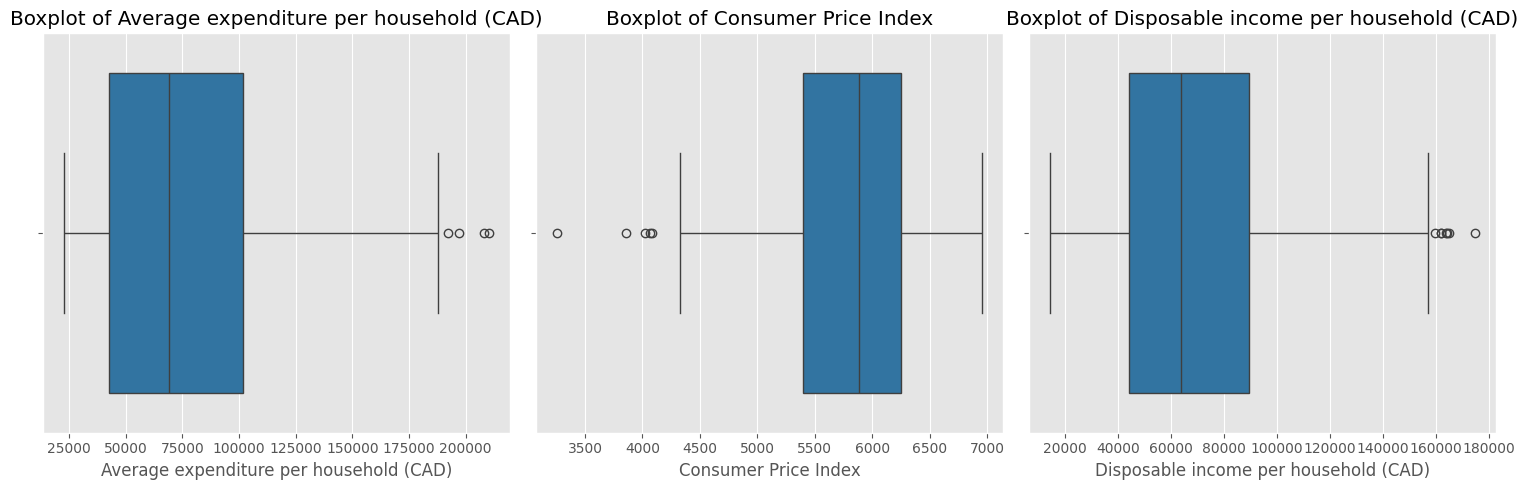

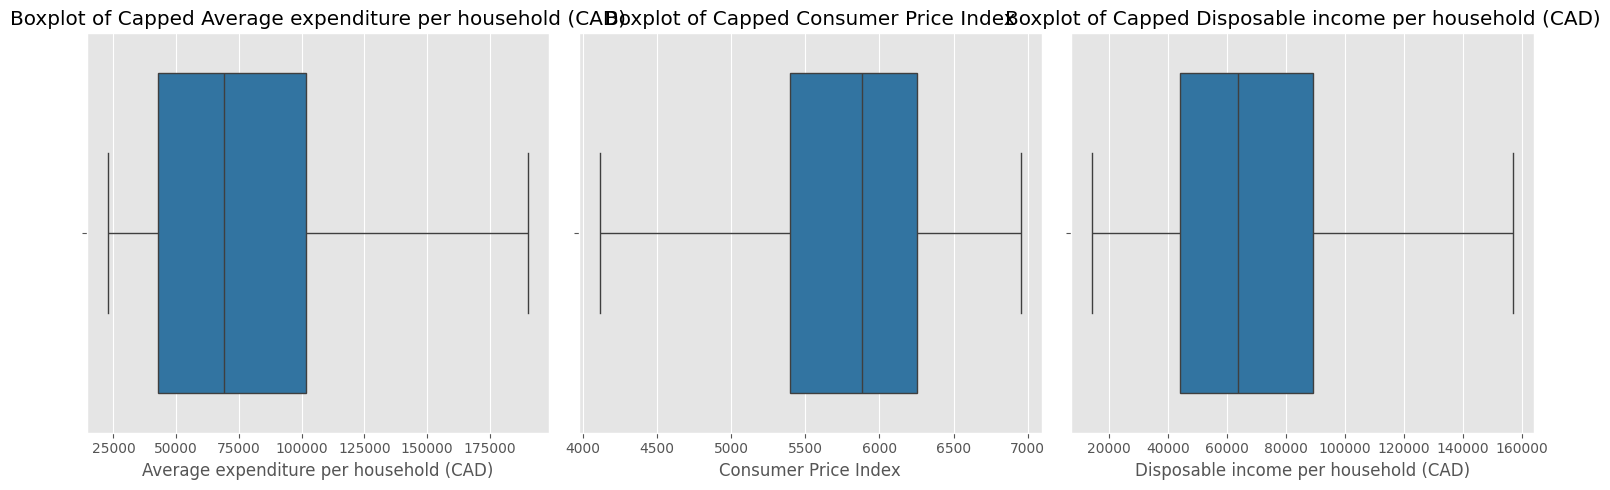

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numeric columns to check for outliers
numeric_columns = ['Average expenditure per household (CAD)', 'Consumer Price Index', 'Disposable income per household (CAD)']

# Visualize initial distributions with box plots
plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=encoded_data, x=column, color='#1f77b4')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Detect outliers using IQR and cap them
encoded_data_capped = encoded_data.copy()  # Make a copy to apply capping
for column in numeric_columns:
    Q1 = encoded_data[column].quantile(0.25)
    Q3 = encoded_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the values outside the lower and upper bounds
    encoded_data_capped[column] = np.where(
        encoded_data[column] < lower_bound, lower_bound,
        np.where(encoded_data[column] > upper_bound, upper_bound, encoded_data[column])
    )

# Visualize capped data with box plots to confirm outlier handling
plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=encoded_data_capped, x=column, color='#1f77b4')
    plt.title(f'Boxplot of Capped {column}')
plt.tight_layout()
plt.show()

### 8.1.3  Multicollinearity Analysis: Variance Inflation Factor (VIF) and Correlation Matrix Heatmap

Numeric columns for VIF calculation (excluding target):
['Year', 'Consumer Price Index', 'Disposable income per household (CAD)']
                                 feature         VIF
0                                   Year  117.998449
1                   Consumer Price Index  154.657179
2  Disposable income per household (CAD)    7.704662


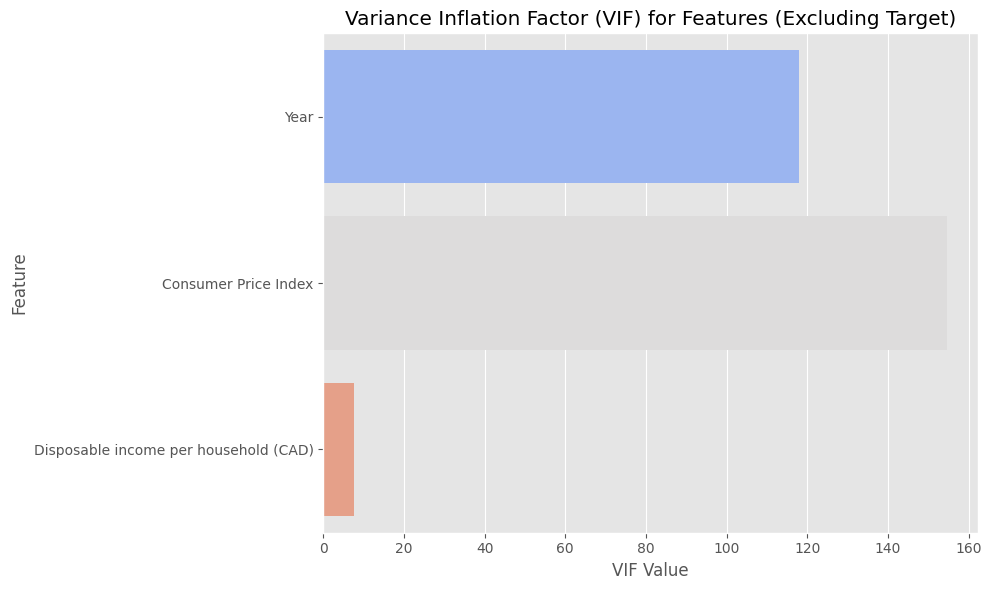

                                                 Year  \
Year                                     1.000000e+00   
Region_British Columbia                 -2.612275e-14   
Region_Ontario                           9.515404e-15   
Region_Quebec                            3.012432e-14   
Region_Saskatchewan                      3.914646e-14   
Income Quintile_Highest quintile        -1.976990e-15   
Income Quintile_Lowest quintile         -1.281515e-15   
Income Quintile_Second quintile          3.191098e-15   
Income Quintile_Third quintile           6.236281e-15   
Average expenditure per household (CAD)  9.834831e-02   
Consumer Price Index                     1.527849e-01   
Disposable income per household (CAD)    8.081586e-02   

                                         Region_British Columbia  \
Year                                               -2.612275e-14   
Region_British Columbia                             1.000000e+00   
Region_Ontario                                     -2.

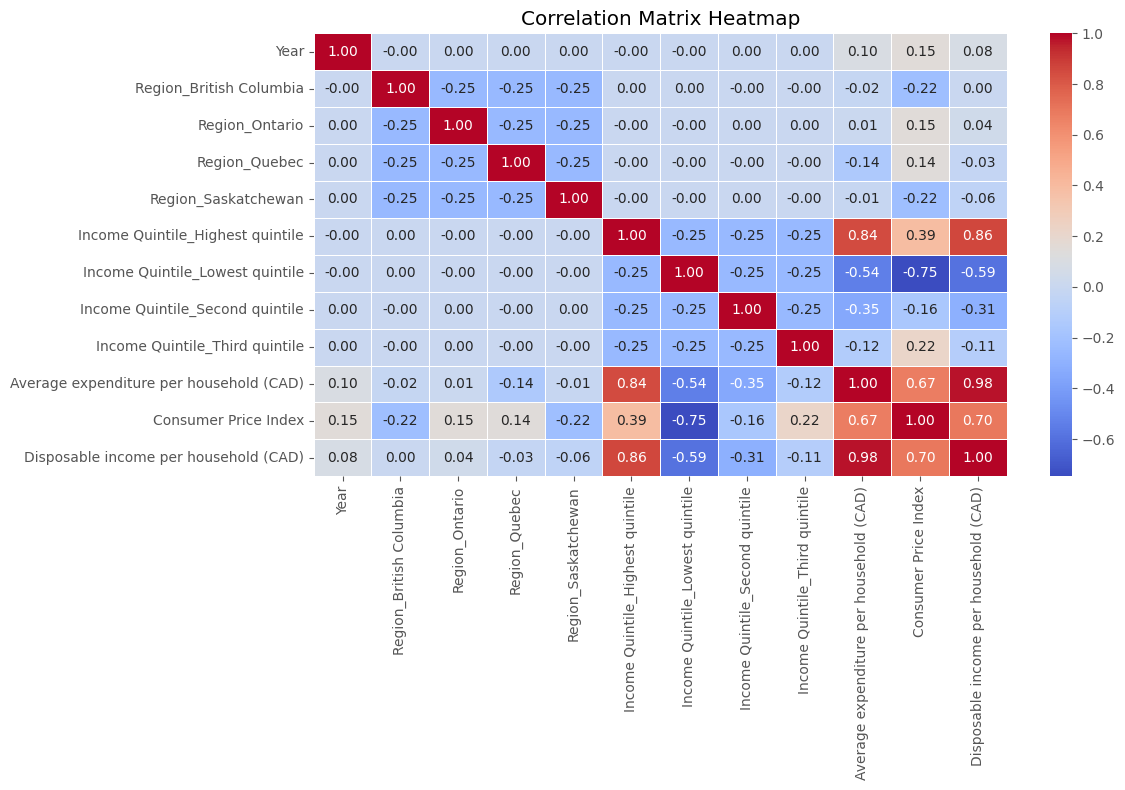

In [29]:
# Variance Inflation Factor (VIF) Calculation

from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Select only numeric columns for VIF calculation
numeric_columns = encoded_data_capped.select_dtypes(include=[np.number])

# Exclude the target variable
numeric_columns = numeric_columns.drop(columns=['Average expenditure per household (CAD)'])
print("Numeric columns for VIF calculation (excluding target):")
print(numeric_columns.columns.tolist())

# Calculate the Variance Inflation Factor (VIF) for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_columns.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_columns.values, i) for i in range(numeric_columns.shape[1])]

# Print VIF data
print(vif_data)

# Visualize the VIF values
plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="feature", data=vif_data, hue="feature", dodge=False, palette="coolwarm", legend=False)
plt.title('Variance Inflation Factor (VIF) for Features (Excluding Target)')
plt.xlabel('VIF Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Correlation Matrix Heatmap (including target variable but not part of VIF)
corr_matrix = encoded_data_capped.corr()
print (corr_matrix)

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

### 8.1.4 Addressing Multicolliearity and Dimensionality Reduction using PCA

Numeric columns for VIF calculation:
['Average expenditure per household (CAD)', 'CPI_Trend', 'PCA_Income_Features']
Numeric columns for VIF calculation (excluding target):
['CPI_Trend', 'PCA_Income_Features']
               feature       VIF
0            CPI_Trend  1.006264
1  PCA_Income_Features  1.006264


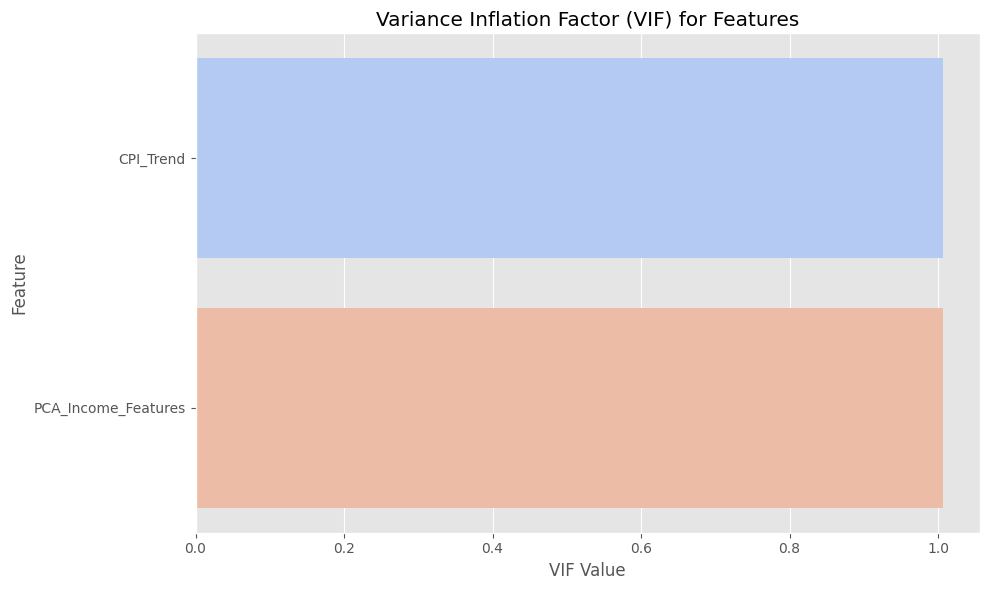

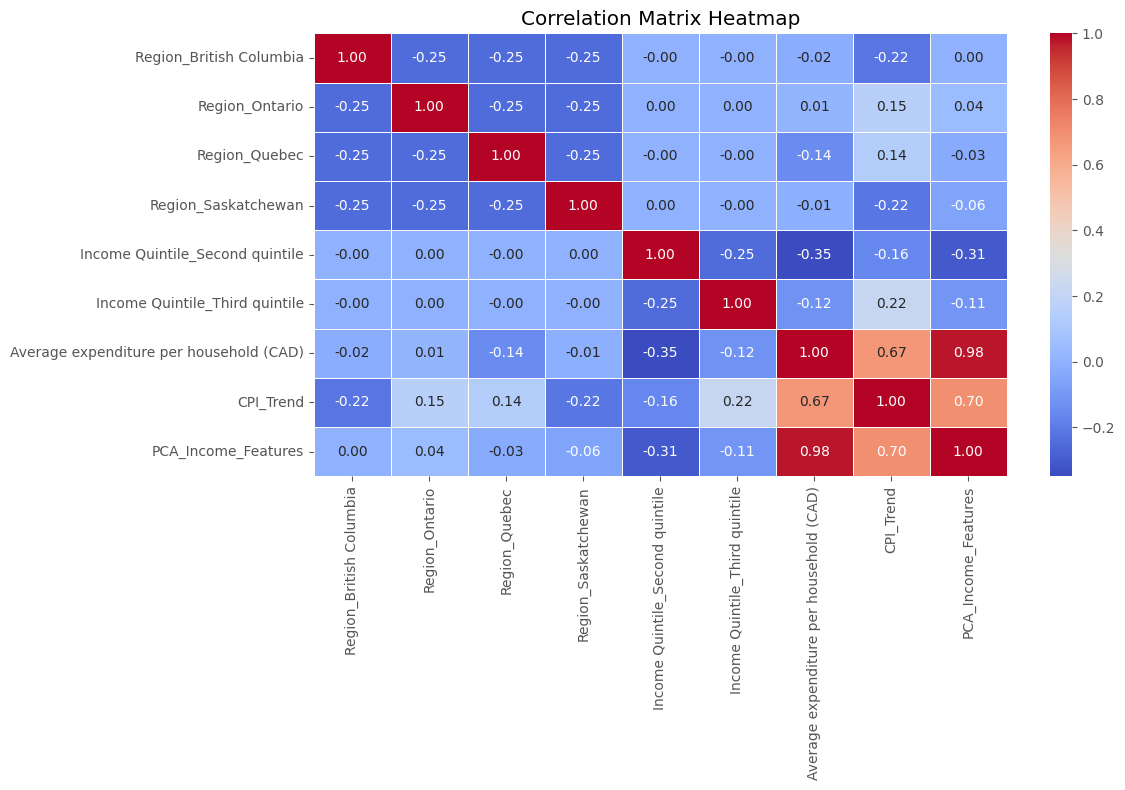

In [30]:
# Defining dataframe
encoded_data_dr = encoded_data_capped

# Create a new variable combining CPI with Year to reduce collinearity
encoded_data_dr['CPI_Trend'] = encoded_data_dr['Consumer Price Index'] * encoded_data_dr['Year']

# Drop the original 'Consumer Price Index' and 'Year' columns if CPI_Trend captures their impact
encoded_data_dr = encoded_data_dr.drop(columns=['Consumer Price Index', 'Year'], errors='ignore')

from sklearn.decomposition import PCA

# PCA for Income Quintile_Highest quintile, Income Quintile_Lowest quintile, and Disposable income per household (CAD)
pca = PCA(n_components=1)  # Reduce to 1 component
encoded_data_dr['PCA_Income_Features'] = pca.fit_transform(encoded_data_dr[[
    'Income Quintile_Highest quintile', 
    'Income Quintile_Lowest quintile', 
    'Disposable income per household (CAD)'
]])

# Drop the original columns replaced by the PCA component
encoded_data_dr.drop(['Income Quintile_Highest quintile', 'Income Quintile_Lowest quintile', 'Disposable income per household (CAD)'], 
                     axis=1, inplace=True)

# Checking the Effect of the Changes Made

# Variance Inflation Factor (VIF) Calculation

from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only numeric columns for VIF calculation
numeric_columns = encoded_data_dr.select_dtypes(include=[np.number])
print("Numeric columns for VIF calculation:")
print(numeric_columns.columns.tolist())

# Exclude the target variable
numeric_columns = numeric_columns.drop(columns=['Average expenditure per household (CAD)'])
print("Numeric columns for VIF calculation (excluding target):")
print(numeric_columns.columns.tolist())

# Calculate the Variance Inflation Factor (VIF) for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_columns.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_columns.values, i) for i in range(numeric_columns.shape[1])]

# Print VIF data
print(vif_data)

# Visualize the VIF values
plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="feature", data=vif_data, hue="feature", dodge=False, palette="coolwarm", legend=False)
plt.title('Variance Inflation Factor (VIF) for Features')
plt.xlabel('VIF Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Correlation Matrix Heatmap
corr_matrix = encoded_data_dr.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

### 8.2 Predictive Models Fitting and Evaluation

### 8.2.1 Linear Regression Model

Linear Regression Mean Squared Error: 49771245.98
Linear Regression Root Mean Squared Error: 7054.87
Linear Regression R² Score: 0.98
Linear Regression Mean Absolute Error: 5648.25
Linear Regression Mean Percentage Error: 8.83%


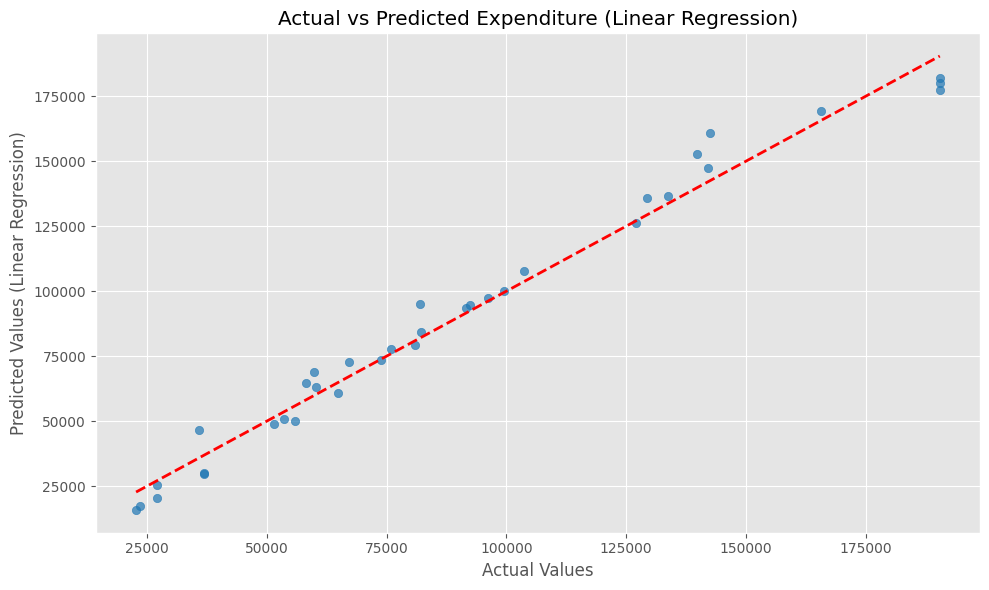

                           Feature    Importance
7              PCA_Income_Features  42199.086512
2                    Region_Quebec   9034.286592
1                   Region_Ontario   5804.274789
0          Region_British Columbia   3857.124582
4  Income Quintile_Second quintile   3491.821292
3              Region_Saskatchewan   2506.469831
6                        CPI_Trend   2317.354585
5   Income Quintile_Third quintile   2225.038216


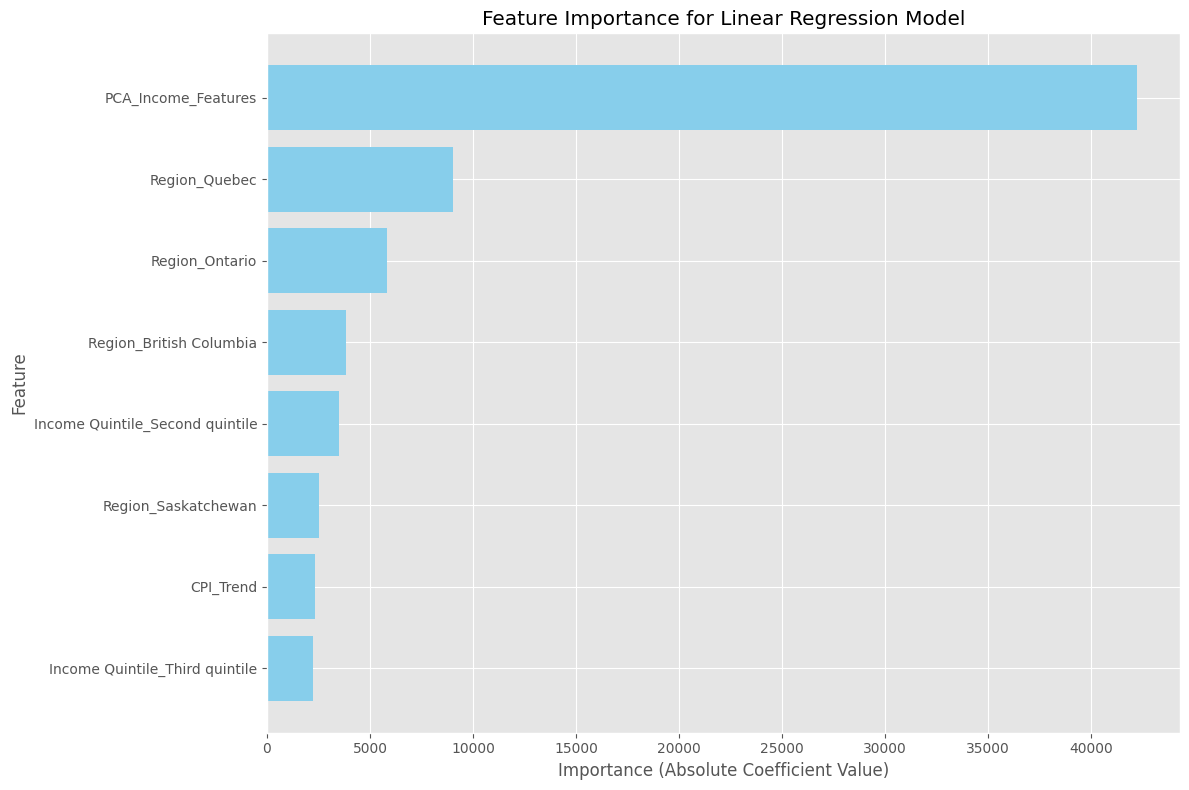

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = encoded_data_dr.drop(columns=['Average expenditure per household (CAD)'])
y = encoded_data_dr['Average expenditure per household (CAD)']

# Step: Scaling the feature sets before splitting into training and testing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a linear regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lr = linear_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

# Print the evaluation metrics
print(f"Linear Regression Mean Squared Error: {mse:.2f}")
print(f"Linear Regression Root Mean Squared Error: {rmse:.2f}")
print(f"Linear Regression R² Score: {r2:.2f}")

# Calculate error rates
absolute_error = np.abs(y_test - y_pred_lr)
percentage_error = (absolute_error / y_test) * 100

# Print the mean absolute and percentage errors
mean_absolute_error = np.mean(absolute_error)
mean_percentage_error = np.mean(percentage_error)

print(f"Linear Regression Mean Absolute Error: {mean_absolute_error:.2f}")
print(f"Linear Regression Mean Percentage Error: {mean_percentage_error:.2f}%")

# Visualize the predicted vs actual values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='#1f77b4', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Linear Regression)')
plt.title('Actual vs Predicted Expenditure (Linear Regression)')
plt.tight_layout()
plt.show()

# Feature Importance Visualization
coefficients = linear_model.coef_
features = X.columns

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': np.abs(coefficients)})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance (Absolute Coefficient Value)')
plt.ylabel('Feature')
plt.title('Feature Importance for Linear Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.tight_layout()
plt.show()

Linear Regression Mean Squared Error: 49771245.98
Linear Regression Root Mean Squared Error: 7054.87
Linear Regression R² Score: 0.98
Linear Regression Mean Absolute Error: 5648.25
Linear Regression Mean Percentage Error: 8.83%


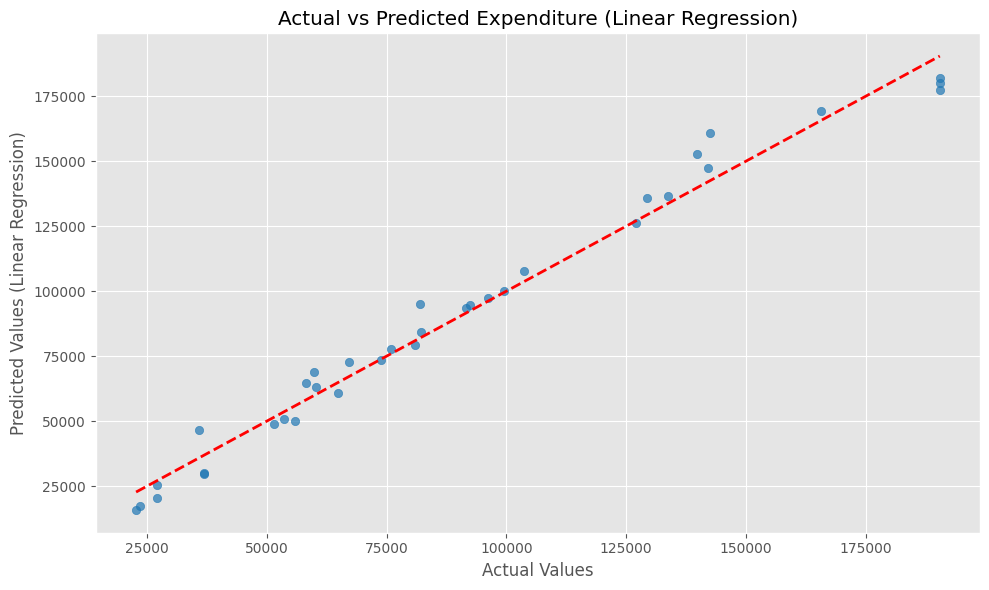

                           Feature    Importance
7              PCA_Income_Features  42199.086512
2                    Region_Quebec   9034.286592
1                   Region_Ontario   5804.274789
0          Region_British Columbia   3857.124582
4  Income Quintile_Second quintile   3491.821292
3              Region_Saskatchewan   2506.469831
6                        CPI_Trend   2317.354585
5   Income Quintile_Third quintile   2225.038216


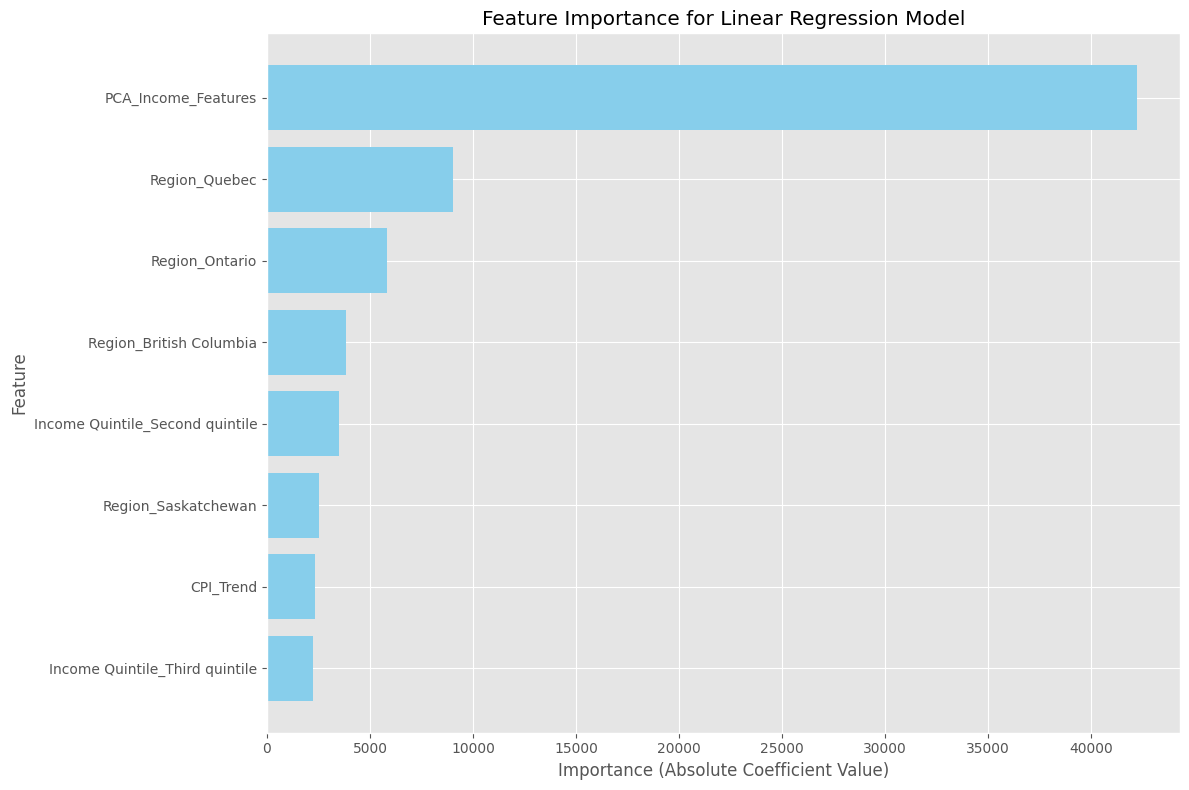

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = encoded_data_dr.drop(columns=['Average expenditure per household (CAD)'])
y = encoded_data_dr['Average expenditure per household (CAD)']

# Step: Scaling the feature sets before splitting into training and testing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a linear regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lr = linear_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

# Print the evaluation metrics
print(f"Linear Regression Mean Squared Error: {mse:.2f}")
print(f"Linear Regression Root Mean Squared Error: {rmse:.2f}")
print(f"Linear Regression R² Score: {r2:.2f}")

# Calculate error rates
absolute_error = np.abs(y_test - y_pred_lr)
percentage_error = (absolute_error / y_test) * 100

# Print the mean absolute and percentage errors
mean_absolute_error = np.mean(absolute_error)
mean_percentage_error = np.mean(percentage_error)

print(f"Linear Regression Mean Absolute Error: {mean_absolute_error:.2f}")
print(f"Linear Regression Mean Percentage Error: {mean_percentage_error:.2f}%")

# Visualize the predicted vs actual values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='#1f77b4', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Linear Regression)')
plt.title('Actual vs Predicted Expenditure (Linear Regression)')
plt.tight_layout()
plt.show()

# Feature Importance Visualization
coefficients = linear_model.coef_
features = X.columns

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': np.abs(coefficients)})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance (Absolute Coefficient Value)')
plt.ylabel('Feature')
plt.title('Feature Importance for Linear Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.tight_layout()
plt.show()

### 8.2.2 Random Forest Regressor

Random Forest Mean Squared Error: 75480556.07
Random Forest Root Mean Squared Error: 8687.95
Random Forest R² Score: 0.97
Random Forest Mean Absolute Error: 6804.50
Random Forest Mean Percentage Error: 7.77%


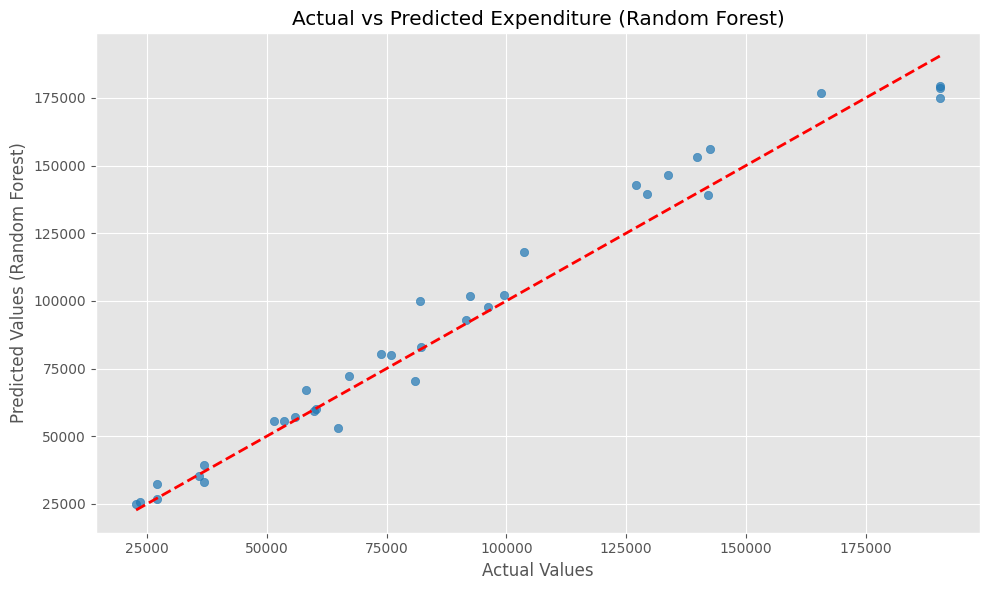

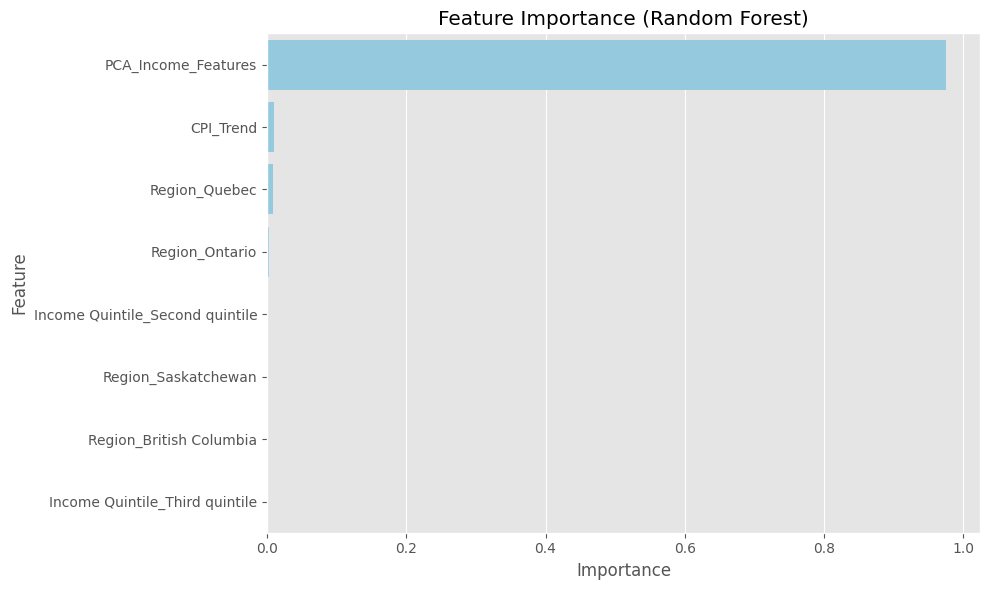

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

# Define features and target variable
X = encoded_data_dr.drop(columns=['Average expenditure per household (CAD)'])
y = encoded_data_dr['Average expenditure per household (CAD)']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor (without hyperparameter tuning)
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics for Random Forest
print(f"Random Forest Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest Root Mean Squared Error: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")

# Calculate error rates
absolute_error = np.abs(y_test - y_pred_rf)
percentage_error = (absolute_error / y_test) * 100

# Print the mean absolute and percentage errors
mean_absolute_error = np.mean(absolute_error)
mean_percentage_error = np.mean(percentage_error)

print(f"Random Forest Mean Absolute Error: {mean_absolute_error:.2f}")
print(f"Random Forest Mean Percentage Error: {mean_percentage_error:.2f}%")

# Visualize the predicted vs actual values for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='#1f77b4', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Random Forest)')
plt.title('Actual vs Predicted Expenditure (Random Forest)')
plt.tight_layout()
plt.show()

# Feature Importance Bar Chart
feature_importances = rf_model.feature_importances_

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### 8.2.3 XGBoost Regressor

XGBoost Mean Squared Error: 53731611.74
XGBoost Root Mean Squared Error: 7330.18
XGBoost R² Score: 0.98
XGBoost Mean Absolute Error: 5802.98
XGBoost Mean Percentage Error: 7.12%


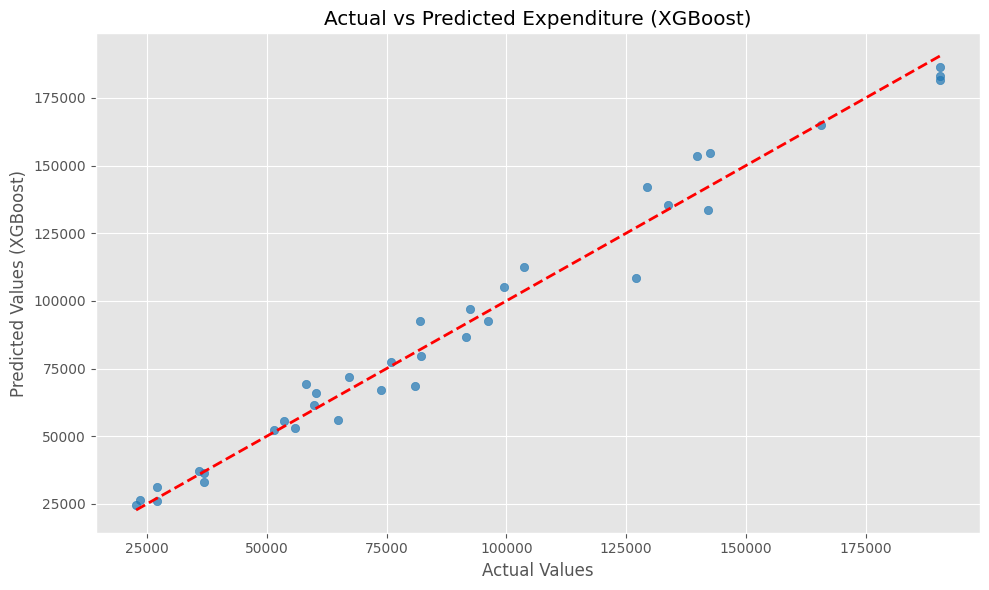

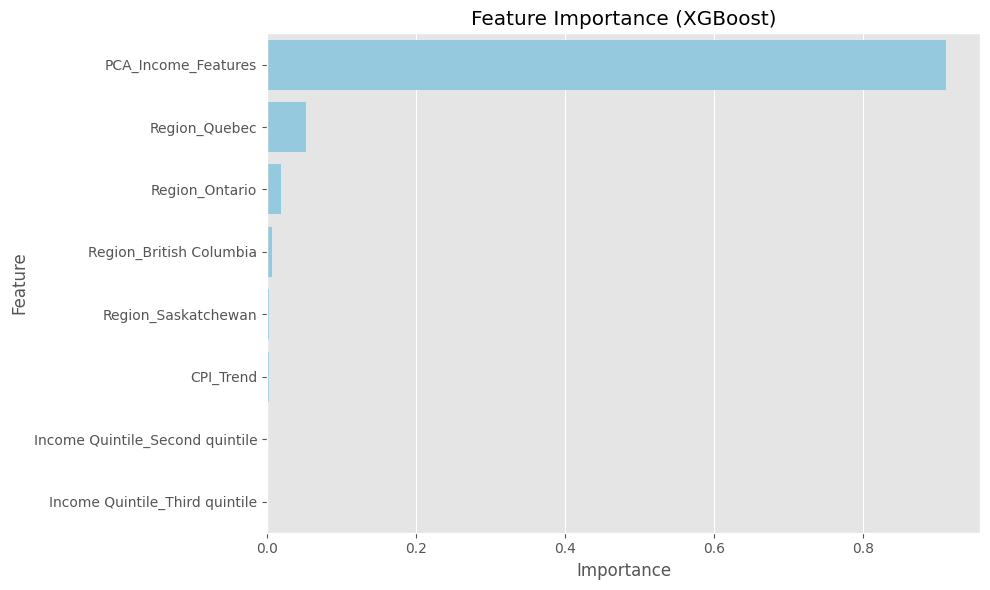

In [33]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = encoded_data_dr.drop(columns=['Average expenditure per household (CAD)'])
y = encoded_data_dr['Average expenditure per household (CAD)']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create an XGBoost model
xgboost_model = XGBRegressor(random_state=42)

# Fit the model
xgboost_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_xgb = xgboost_model.predict(X_test)

# Evaluate the model's performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the evaluation metrics for XGBoost
print(f"XGBoost Mean Squared Error: {mse_xgb:.2f}")
print(f"XGBoost Root Mean Squared Error: {rmse_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.2f}")

# Calculate error rates
absolute_error_xgb = np.abs(y_test - y_pred_xgb)
percentage_error_xgb = (absolute_error_xgb / y_test) * 100

# Print the mean absolute and percentage errors
mean_absolute_error_xgb = np.mean(absolute_error_xgb)
mean_percentage_error_xgb = np.mean(percentage_error_xgb)

print(f"XGBoost Mean Absolute Error: {mean_absolute_error_xgb:.2f}")
print(f"XGBoost Mean Percentage Error: {mean_percentage_error_xgb:.2f}%")

# Visualize the predicted vs actual values for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='#1f77b4', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (XGBoost)')
plt.title('Actual vs Predicted Expenditure (XGBoost)')
plt.tight_layout()
plt.show()

# 4. Feature Importance
feature_importances = xgboost_model.feature_importances_

# Create a DataFrame to visualize feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='skyblue')
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### 8.2.4 Neural Network Regressor

Neural Network Mean Squared Error: 147076108.91
Neural Network Root Mean Squared Error: 12127.49
Neural Network R² Score: 0.94
Neural Network Mean Absolute Error: 8481.98
Neural Network Mean Percentage Error: 14.58%


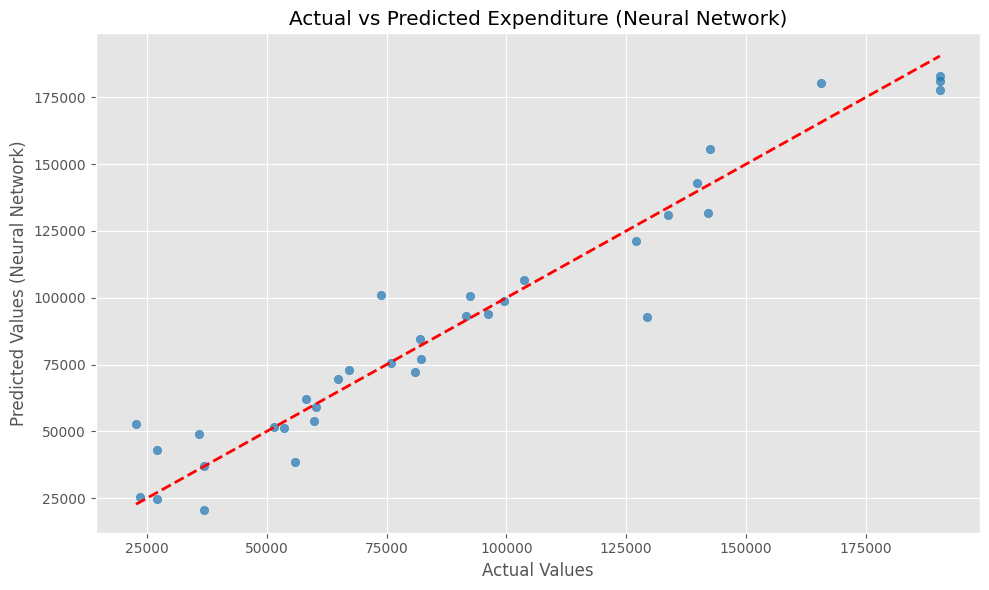

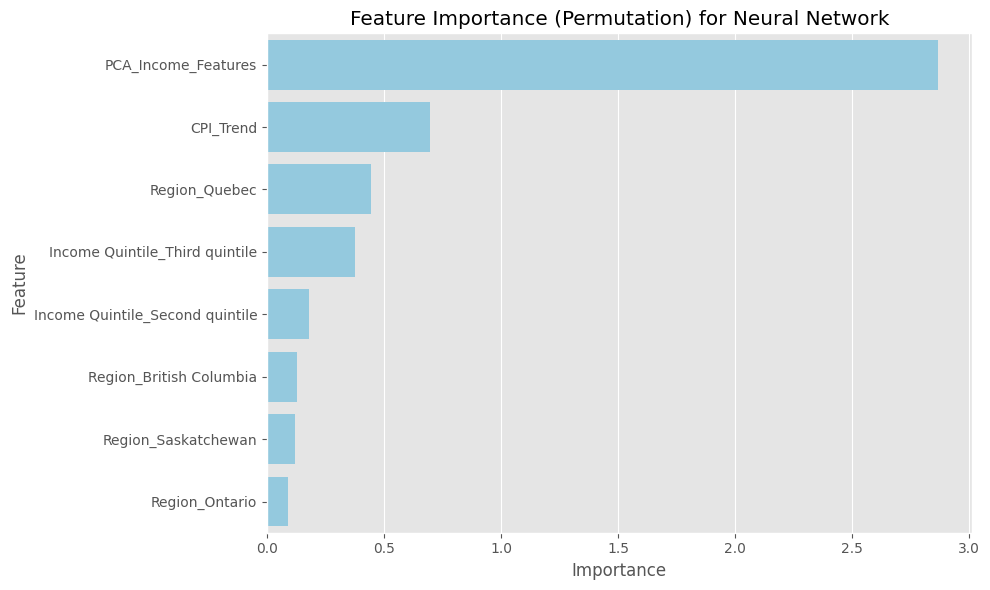

In [34]:
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import seaborn as sns
from sklearn.inspection import permutation_importance

# Suppress ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define features and target variable
X = encoded_data_dr.drop(columns=['Average expenditure per household (CAD)'])
y = encoded_data_dr['Average expenditure per household (CAD)']

# Step: Scaling the feature sets before splitting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Neural Network model with optimized parameters
neural_network_model = MLPRegressor(
    solver='lbfgs',                     
    hidden_layer_sizes=(128, 64, 32),
    max_iter=2000,                    
    learning_rate='adaptive',        
    learning_rate_init=0.0005,         
    alpha=0.0001,                    
    batch_size='auto',               
    tol=1e-6,                         
    early_stopping=True,               
    validation_fraction=0.2,           
    random_state=42                   
)

# Fit the model on the scaled training data
neural_network_model.fit(X_train, y_train)

# Make predictions on the scaled testing set
y_pred_nn = neural_network_model.predict(X_test)

# Evaluate the model's performance
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Print the evaluation metrics for the Neural Network
print(f"Neural Network Mean Squared Error: {mse_nn:.2f}")
print(f"Neural Network Root Mean Squared Error: {rmse_nn:.2f}")
print(f"Neural Network R² Score: {r2_nn:.2f}")

# Calculate error rates
absolute_error_nn = np.abs(y_test - y_pred_nn)
percentage_error_nn = (absolute_error_nn / y_test) * 100

# Print the mean absolute and percentage errors
mean_absolute_error_nn = np.mean(absolute_error_nn)
mean_percentage_error_nn = np.mean(percentage_error_nn)

print(f"Neural Network Mean Absolute Error: {mean_absolute_error_nn:.2f}")
print(f"Neural Network Mean Percentage Error: {mean_percentage_error_nn:.2f}%")

# Visualize the predicted vs actual values for Neural Network
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, color='#1f77b4', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Neural Network)')
plt.title('Actual vs Predicted Expenditure (Neural Network)')
plt.tight_layout()
plt.show()

# Permutation Importance
results = permutation_importance(neural_network_model, X_test, y_test, n_repeats=10, random_state=42)

# Extract the mean importance scores for each feature
importance = results.importances_mean

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='skyblue')
plt.title('Feature Importance (Permutation) for Neural Network')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### 8.3 Evaluating Individual Model Performance Metrics and Selecting the Best Model

<div style="display: flex; justify-content: space-around; align-items: center;">
    <img src="https://i.imgur.com/nd2mSlp.png" alt="Model Comparisson" width="1200" height="500" style="margin: 0 50px;"/>
</div>

 - Linear Regression is the best overall model, with the lowest Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE), along with a high R² score of 0.98. 
 - XGBoost also performs well, particularly excelling in minimizing Mean Percentage Error (MPE) at 7.12%. 
 - Both Linear Regression and XGBoost have the highest R² score, but Linear Regression stands out in terms of accuracy and lower error. 
 - If minimizing percentage error is a priority, XGBoost is the better choice, while Linear Regression is best for overall accuracy and lower error magnitude.

### 8.4 Cross validation across Four Models

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd

# Define the features and target variable
X = encoded_data_dr.drop(columns=['Average expenditure per household (CAD)'])
y = encoded_data_dr['Average expenditure per household (CAD)']

# Standardize the features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the models
neural_network_model = MLPRegressor(
    solver='lbfgs',                     
    hidden_layer_sizes=(128, 64, 32),
    max_iter=2000,                    
    learning_rate='adaptive',        
    learning_rate_init=0.0005,         
    alpha=0.0001,                    
    batch_size='auto',               
    tol=1e-6,                         
    early_stopping=True,               
    validation_fraction=0.2,           
    random_state=42                   
)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Neural Network': neural_network_model 
}

# Create an empty dictionary to store cross-validation results
results = {'Model': [], 'MSE Mean': [], 'MSE Std Dev': [], 'R² Mean': [], 'R² Std Dev': []}

# Perform cross-validation for each model
for model_name, model in models.items():
    # MSE cross-validation
    mse_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    
    # R² cross-validation
    r2_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
    
    # Store the results
    results['Model'].append(model_name)
    results['MSE Mean'].append(np.mean(-mse_scores))  # Convert negative MSE back to positive
    results['MSE Std Dev'].append(np.std(-mse_scores))  # Convert negative MSE back to positive
    results['R² Mean'].append(np.mean(r2_scores))
    results['R² Std Dev'].append(np.std(r2_scores))

# Convert the results dictionary into a DataFrame for easier viewing
cv_results = pd.DataFrame(results)

# Display the results
print(cv_results)


               Model      MSE Mean   MSE Std Dev   R² Mean  R² Std Dev
0  Linear Regression  3.733866e+07  1.030911e+07  0.982039    0.005516
1      Random Forest  6.922439e+07  2.653907e+07  0.966702    0.013729
2            XGBoost  6.194698e+07  2.629597e+07  0.970450    0.012564
3     Neural Network  1.283613e+08  6.035200e+07  0.937568    0.033522


### 8.5 Cross-Validation Performance Comparison and Best Model Selection

<div style="display: flex; justify-content: space-around; align-items: center;">
    <img src="https://i.imgur.com/TtZJszW.png" alt="Model Cross Validation" width="1000" height="500" style="margin: 0 70px;"/>
</div>


 - After cross-validation, Linear Regression remains the best model across all metrics. It has the lowest Mean Squared Error (MSE) mean and the lowest standard deviation, indicating both accuracy and consistency. Additionally, Linear Regression has the highest R² mean and the lowest R² standard deviation, showing it provides the most stable performance and explains the most variance in the data. 
 - Overall, Linear Regression outperforms other models in both accuracy and stability.

### 8.6 Optimizing Linear Regression Performance with Feature Selection and Regularization Techniques (RFE, Ridge, Lasso)

Selected Features: Index(['Region_British Columbia', 'Region_Ontario', 'Region_Quebec',
       'Region_Saskatchewan', 'Income Quintile_Second quintile',
       'Income Quintile_Third quintile', 'CPI_Trend', 'PCA_Income_Features'],
      dtype='object')
Linear Regression Mean Squared Error: 49771245.98
Linear Regression Root Mean Squared Error: 7054.87
Linear Regression R² Score: 0.98
Ridge Regression Mean Squared Error: 50632723.72
Ridge Regression Root Mean Squared Error: 7115.67
Ridge Regression R² Score: 0.98
Lasso Regression Mean Squared Error: 49771359.99
Lasso Regression Root Mean Squared Error: 7054.88
Lasso Regression R² Score: 0.98
Best model based on R² Score: Linear Regression


D:\4th semester project\rajibi\env\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=10 > n_features=8. There will be no feature selection and all features will be kept.
  warnings.warn(


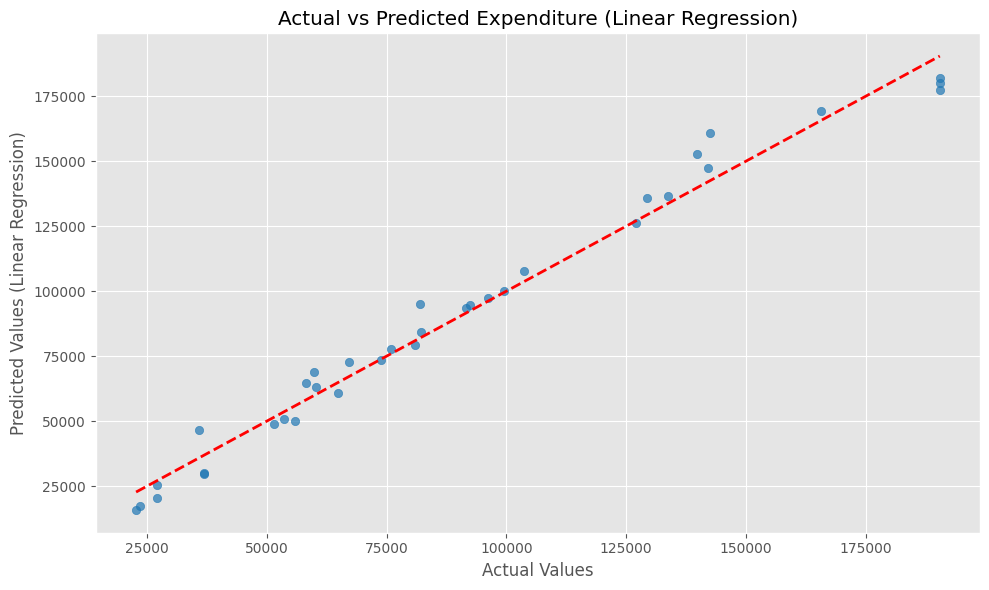

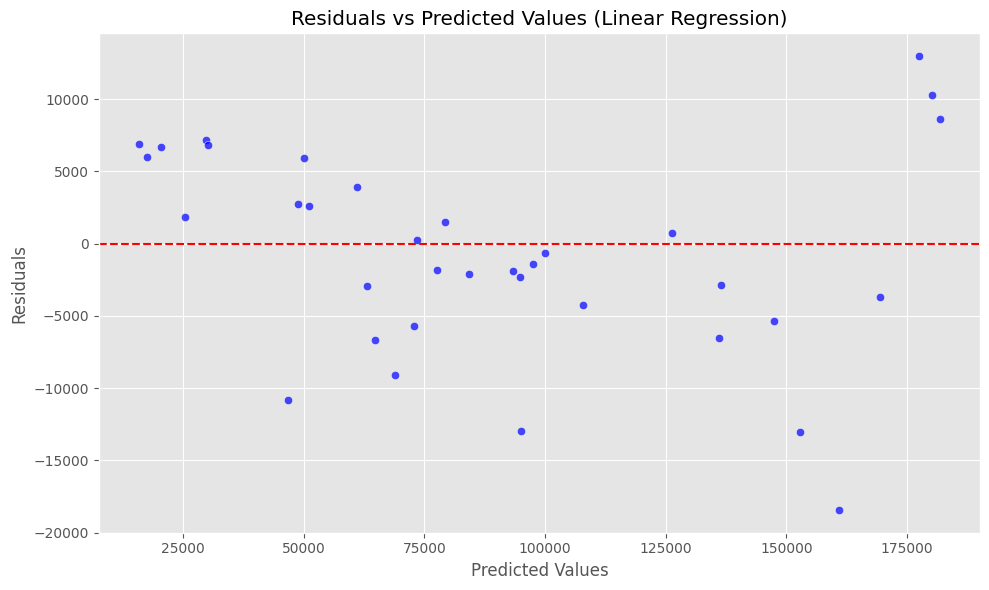

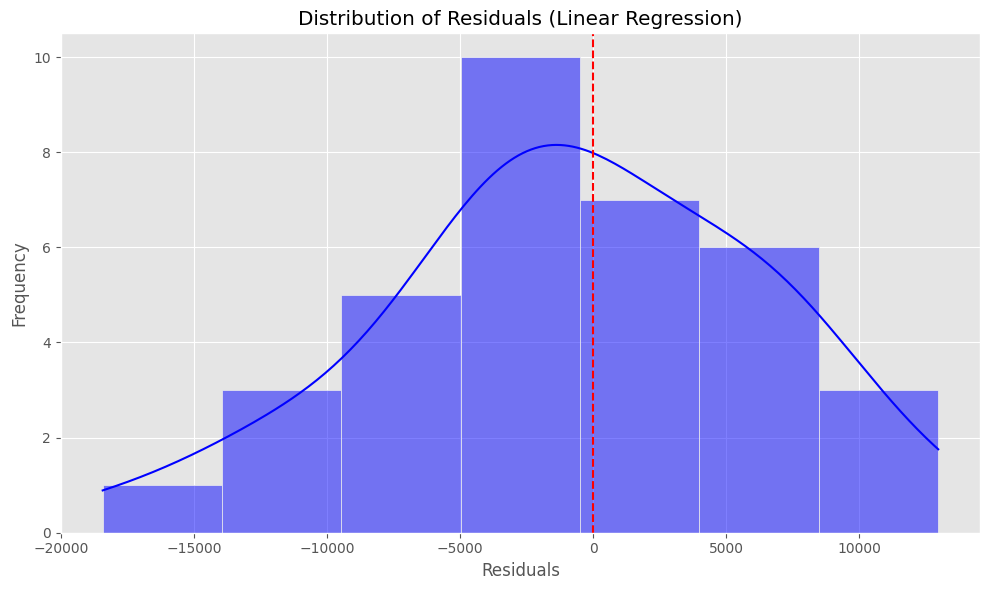

Linear Regression Cross-Validation RMSE (5-fold): 6110.54


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

# Define features and target variable
X = encoded_data_dr.drop(columns=['Average expenditure per household (CAD)'])
y = encoded_data_dr['Average expenditure per household (CAD)']

# Step: Scaling the feature sets before splitting into training and testing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection using Recursive Feature Elimination (RFE)
selector = RFE(LinearRegression(), n_features_to_select=10)  # Select top 10 features
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.support_]

print(f"Selected Features: {selected_features}")

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create a linear regression model with Ridge and Lasso for regularization
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),  # Add alpha for regularization strength
    'Lasso Regression': Lasso(alpha=0.01)  # Add alpha for regularization strength
}

best_model = None
best_r2 = -np.inf

# Iterate through models and evaluate using cross-validation
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} Mean Squared Error: {mse:.2f}")
    print(f"{model_name} Root Mean Squared Error: {rmse:.2f}")
    print(f"{model_name} R² Score: {r2:.2f}")
    
    # Keep track of the best model
    if r2 > best_r2:
        best_r2 = r2
        best_model = model_name

# Print the best model based on R² Score
print(f"Best model based on R² Score: {best_model}")

# Visualizing the best model's predictions vs actual values
best_model_instance = models[best_model]
y_pred_best = best_model_instance.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='#1f77b4', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel('Actual Values')
plt.ylabel(f'Predicted Values ({best_model})')
plt.title(f'Actual vs Predicted Expenditure ({best_model})')
plt.tight_layout()
plt.show()

# Visualizing the residuals for the best model
residuals = y_test - y_pred_best

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_best, y=residuals, color='blue', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title(f'Residuals vs Predicted Values ({best_model})')
plt.tight_layout()
plt.show()

# Distribution of residuals (Error Distribution)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title(f'Distribution of Residuals ({best_model})')
plt.tight_layout()
plt.show()

# Cross-validation to assess model performance (for Linear Regression)
cv_scores = cross_val_score(models['Linear Regression'], X_selected, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(np.mean(np.abs(cv_scores)))  # Convert MSE to RMSE
print(f"Linear Regression Cross-Validation RMSE (5-fold): {cv_rmse:.2f}")


### 9 CONCLUSION AND RECOMMENDATION

The focus of this study has been on the Canadian consumer spending over the last 12 years emphasizing interprovincial disparities, category-specific trends, and the influence of key economic and demographic factors, including income, inflation, household size, and age. The analysis reveals a consistent rise in essential spending on housing and food, while transportation and discretionary spending showed variability, particularly during the pandemic. Regional differences emphasize the significant role of localized economic conditions in shaping household expenditure patterns.

Among the predictive models evaluated, Linear Regression stood out to be the most effective, consistently achieving the lowest error rates and highest R² score, making it ideal for long-term demand forecasting. XGBoost, with the lowest Mean Percentage Error (MPE), is a strong alternative when minimizing relative errors is crucial, especially for short-term predictions.

Businesses should use these insights to refine strategies, focusing on regional differences and key sectors such as housing, food, and transportation. It's also important to consider additional factors like consumer confidence, technological advances, and government policies—elements not addressed in this study due to data limitations-to better understand market dynamics and adjust strategies accordingly.

For demand forecasting, Linear Regression is recommended for long-term accuracy, while XGBoost is suited for minimizing relative errors in short-term predictions. By continuously optimizing these models and integrating real-time data, businesses can improve resource allocation, refine marketing strategies, and adapt to shifting consumer behavior.